# Measurement Model Validation of Second-Harmonic Nonlinear Electrochemical Impedance Spectroscopy

### Yuefan Ji, An-Hung Shih, Rebecca C. Vincent, Rose Y. Lee, and Daniel T. Schwartz<br>*Department of Chemical Engineering & Clean Energy Institute,<br>University of Washington*

# Supplementary Notebook

## List of Figures

## Main
### - [Figure 4. Validation Results with Weakly Nonlinear RC](#Figure-4.)
### - [Figure 5. Validation Results with Weakly Nonlinear Porous Electrode](#Figure-5.)
### - [Figure 6. Kramers-Kronig Test for Extracted EIS and 2nd-NLEIS (18650 Cell)](#Figure-6.)
### - [Figure 7. Measurement Model Test for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation (cost method)](#Figure-7.)
### - [Figure 8. Measurement Model Test for Pouch Cell Replicates (cost method)](#Figure-8.)
### - [Figure 9. Kramers-Kronig Test for EIS and 2nd-NLEIS (In-house Coin Cell)](#Figure-9.)



## SI

### - [Figure S2. The Gaussian Distribution of the Introduced Error](#Figure-S2.)
### - [Figure S3. THD of 18650 Cell](#Figure-S3.)
### - [Figure S4. EIS and 2nd-NLEIS Data for 18650 Cell with 0.3, 0.4, 0.5 A Perturbation](#Figure-S4.)
### - [Figure S5. LinKK Results for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation](#Figure-S5.)
### - [Figure S6. Measurement Model Test for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation (conf method)](#Figure-S6.)
### - [Figure S8. THD Results for Pouch Cell Replicates](#Figure-S8.)
### - [Figure S9. LinKK Results for Pouch Cell Replicates](#Figure-S9.)
### - [Figure S10. Measurement Model Test for Pouch Cell Replicates (conf method)](#Figure-S10.)
### - [Figure S12. THD Results for In-house Coin Cell](#Figure-S12.)
### - [Figure S13. Measurement Model Test for In-house Coin Cell (conf method)](#Figure-S13.)




## Load Essential Packages

In [1]:
## editing system path to enable the load of the nleis.py in the repo
import os.path
import sys
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Get the parent directory by moving up one level
parent_dir = os.path.dirname(current_dir)
# Add the parent directory to the Python path
sys.path.append(parent_dir)

In [2]:
### ## Essential packages
import os
import numpy as np
import pandas as pd
import string

from scipy import constants
from scipy.optimize import minimize_scalar

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

### Essential function from impedance.py and nleis.py  
from nleis.visualization import plot_first,plot_second
from nleis import NLEISCustomCircuit
from impedance.models.circuits import CustomCircuit
from nleis.validation import MM
from impedance.visualization import plot_residuals
from impedance.validation import linKK
from nleis.data_processing import fft_data, data_loader, thd


### Define default values and utility functions

In [3]:
std = 0.05
fontsize =16
plt.rcParams.update({'font.size': 16})

In [4]:
def Z_add_noise(Z, std,type = 'complex',depedency ='True',seed = 22):
    ## Seed the random generator
    np.random.seed(seed)
    if type == 'complex' and depedency:
        Z_noise_real = np.random.normal(Z.real, std * abs(Z.real))
        Z_noise_imag = np.random.normal(Z.imag, std * np.abs(Z.imag))
        Z_noise = Z_noise_real + 1j * Z_noise_imag
    return(Z_noise)
        

In [5]:
def residual_plot(ax, f, data, model, xlim = [1e-3,10], ylim = [-25,25], fontsize = 14, legend = ''):

    ax.plot(f, data*100, '.-', ms = 10)
    ax.plot(f, model*100, '.-', ms = 10)

    # Make x axis log scale
    ax.set_xscale('log')

    # Set the labels to delta vs f
    ax.set_ylabel('$\\Delta$ $(\\%)$', fontsize=fontsize)
    ax.set_xlabel('$f$ [Hz]', fontsize=fontsize)

    # Make the tick labels larger
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # Change the number of labels on y axis to four
    ax.locator_params(axis='y', nbins=4, tight=True)

    # Add a light grid
    ax.grid(visible=True, which='major', axis='both', alpha=.5)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.legend(legend,fontsize=fontsize, loc = 'upper left')


## Linear and Weakly Nonlinear Randles circuit

In [6]:
f = np.geomspace(1e-3, 1e2, num=100)

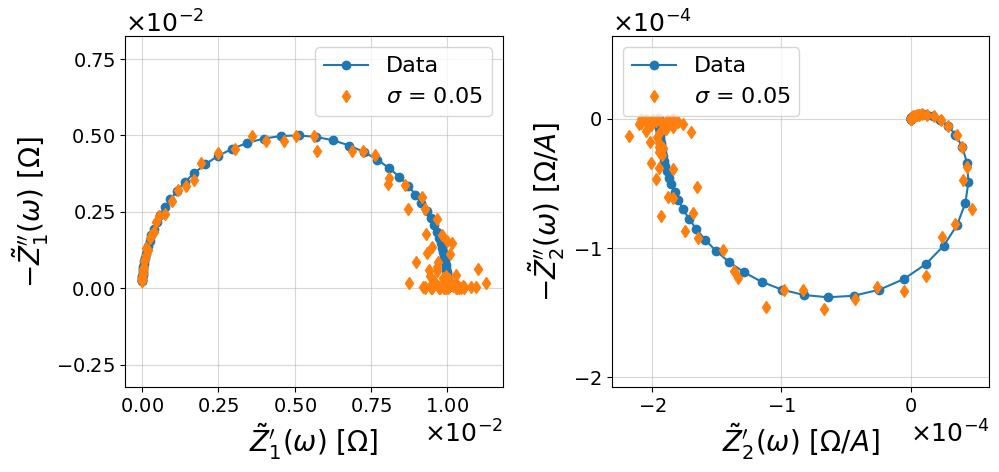

In [7]:
Rct = .01 # Ohms (Charge Transfer Resistance)
Cdl = 7.2 # F   (Double layer capacitance of the porous interface)
e = 0.1 # asymmetry parameter

## EIS
circuit='RC'
initial_guess =[Rct, Cdl]
model = CustomCircuit(circuit, initial_guess = initial_guess)
Z1_RC = model.predict(f)
Z1_RC_noise = Z_add_noise(Z1_RC,std=std)

## 2nd-NLEIS
circuit='RCn'
initial_guess =[Rct, Cdl,e]
model = NLEISCustomCircuit(circuit, initial_guess = initial_guess)
Z2_RC = model.predict(f)
Z2_RC_noise = Z_add_noise(Z2_RC,std=std)

fig,ax = plt.subplots(1,2,figsize = (10,5))
## EIS
plot_first(ax[0],Z1_RC,fmt = '-o')
plot_first(ax[0],Z1_RC_noise,fmt='d')
ax[0].legend(['Data','$\sigma$ = 0.05'])
## 2nd-NLEIS
plot_second(ax[1],Z2_RC,fmt = '-o')
plot_second(ax[1],Z2_RC_noise,fmt='d')
ax[1].legend(['Data','$\sigma$ = 0.05'])

plt.tight_layout()
plt.show()

### Measurement Model Tests

  0%|          | 0/20 [00:00<?, ?it/s]

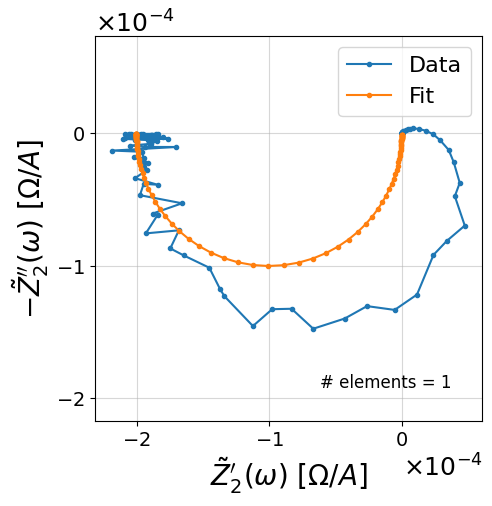

100%|██████████| 1/1 [00:00<00:00,  3.64it/s] 

Optimal solution found with M = 1


In [8]:
## conf method with RC (K) as basis function
RC_results_conf_K = MM(f,Z2_RC_noise,raw_circuit='K',initial_guess = [-0.01,.01], method = 'conf', max_f = np.inf,
                    max_M = 20, tol = 5e-5, k = 2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

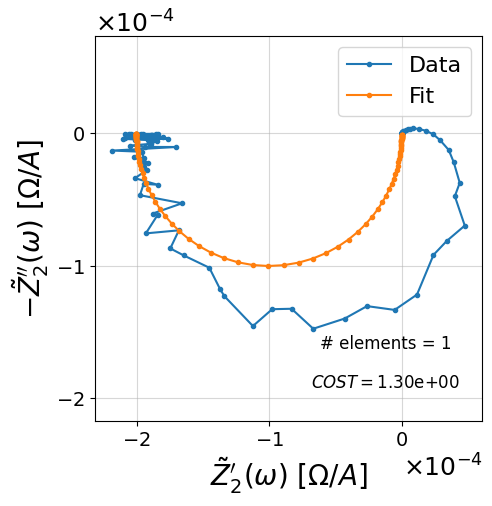

  5%|▌         | 1/20 [00:00<00:02,  9.26it/s]

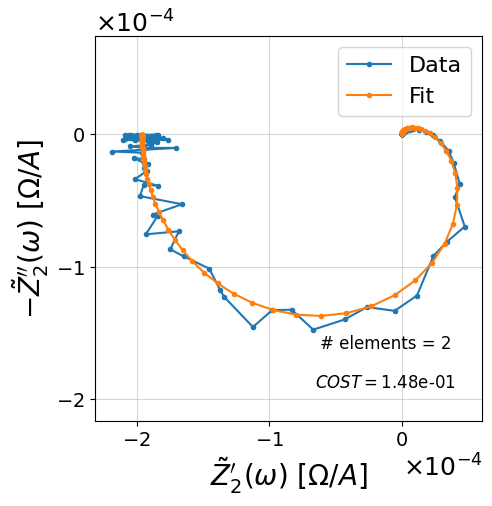

 10%|█         | 2/20 [00:00<00:03,  5.28it/s]

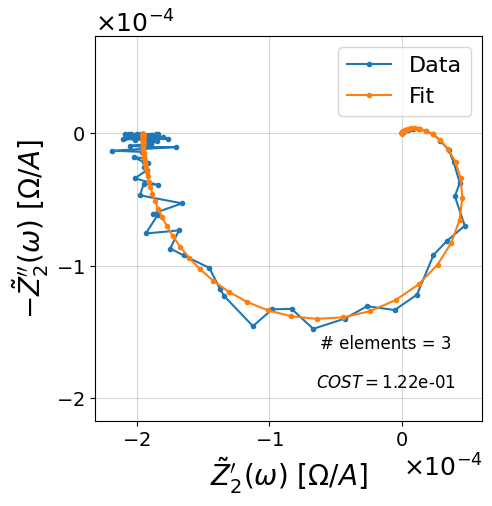

100%|██████████| 3/3 [00:01<00:00,  2.57it/s] 

Optimal solution found with M = 3


In [9]:
# cost method using RC (K) as basis function
RC_results_cost_K = MM(f,Z2_RC_noise,raw_circuit='K',initial_guess = [-0.01,.01], method = 'cost', max_f = np.inf,
                    max_M = 20, tol = 5e-4, k = 2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

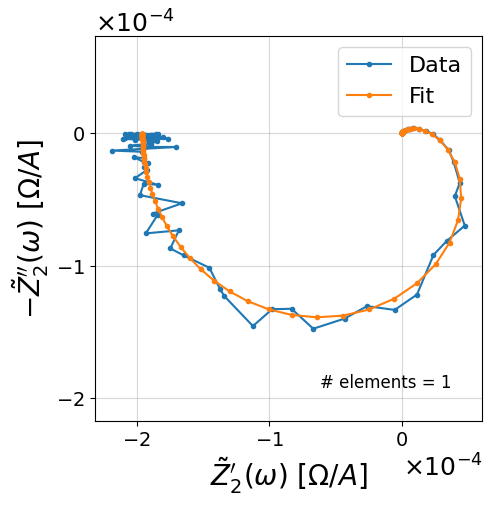

100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

Optimal solution found with M = 1


In [10]:
## conf method with NLRC (Kn) as basis function
RC_results_conf_Kn = MM(f,Z2_RC_noise,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = np.inf,
                    max_M = 20, tol = 5e-4, k = 2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

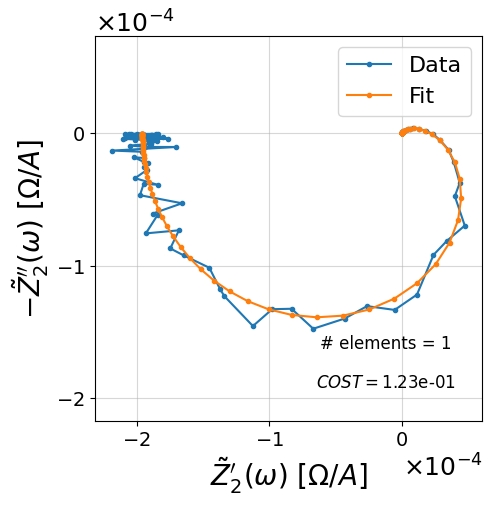

100%|██████████| 1/1 [00:00<00:00,  8.72it/s] 

Optimal solution found with M = 1


In [11]:
## cost Method with NLRC (Kn) as basis function
RC_results_cost_Kn = MM(f,Z2_RC_noise,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = np.inf,
                    max_M = 20, tol = 5e-4, k = 2, plot=True,CI_plot=False)

## Figure 4. 
### Validation Results with Weakly Nonlinear RC

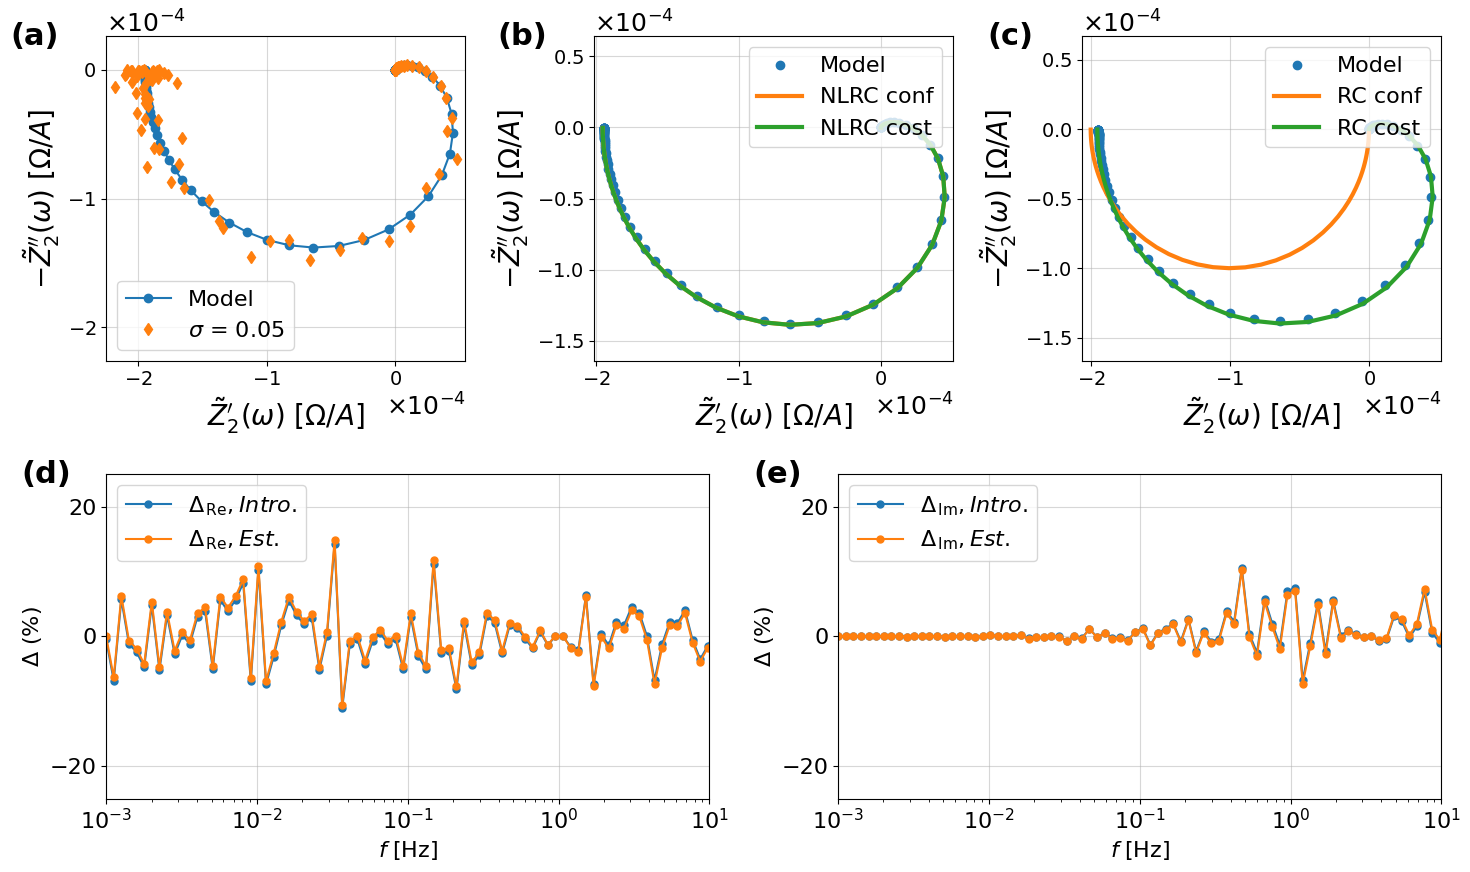

In [12]:
# initialize the figure with 5 plots
fig = plt.figure(figsize=(10*1.5, 6*1.5))

# Create a GridSpec with 2 rows and 6 columns
gs = gridspec.GridSpec(2, 6)

# First row: three subplots, each spanning 2 columns
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])

# Second row: two subplots, each spanning 3 columns
ax4 = fig.add_subplot(gs[1, 0:3])
ax5 = fig.add_subplot(gs[1, 3:6])

# add figure number
ax1.text(-0.2, 1, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes, size=22, weight='bold')
ax2.text(-0.2, 1, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes, size=22, weight='bold')
ax3.text(-0.2, 1, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax3.transAxes, size=22, weight='bold')

ax4.text(-0.1, 1, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax4.transAxes, size=22, weight='bold')
ax5.text(-0.1, 1, '(e)',horizontalalignment='center',verticalalignment='center', transform=ax5.transAxes, size=22, weight='bold')

## Figure (a)
plot_second(ax1,Z2_RC,fmt = '-o')
plot_second(ax1,Z2_RC_noise,fmt='d')

ax1.legend(['Model','$\sigma$ = 0.05'])
ax1.set_ylim([-3e-4,1e-4])

## Figure (b)
plot_second(ax2,Z2_RC,fmt='o',lw = 3, color = 'C0')
plot_second(ax2,RC_results_conf_Kn[3],fmt='-',lw = 3, color = 'C1')
plot_second(ax2,RC_results_cost_Kn[3],fmt='-',lw = 3, color = 'C2')

ax2.legend(['Model','NLRC conf','NLRC cost'],loc = 'upper right')
ax2.set_ylim([-3e-4,2e-4])

## Figure (c)
plot_second(ax3,Z2_RC,fmt='o',lw = 3, color = 'C0')
plot_second(ax3,RC_results_conf_K[3],fmt='-',lw = 3, color = 'C1')
plot_second(ax3,RC_results_cost_K[3],fmt='-',lw = 3, color = 'C2')

ax3.legend(['Model','RC conf','RC cost'],loc = 'upper right')
ax3.set_ylim([-3e-4,2e-4])

## Figure (d)
res_real = (Z2_RC_noise.real-Z2_RC.real)/abs(Z2_RC_noise)
ax4.plot(f, res_real*100, '.-', ms = 10)
res_real = RC_results_cost_Kn[4]
ax4.plot(f, res_real*100, '.-', ms = 10)

# Make x axis log scale
ax4.set_xscale('log')

# Set the labels to delta vs f
ax4.set_ylabel('$\\Delta$ $(\\%)$', fontsize=fontsize)
ax4.set_xlabel('$f$ [Hz]', fontsize=fontsize)

# Make the tick labels larger
ax4.tick_params(axis='both', which='major', labelsize=fontsize)

# Change the number of labels on y axis to four
ax4.locator_params(axis='y', nbins=4, tight=True)

# Add a light grid
ax4.grid(visible=True, which='major', axis='both', alpha=.5)
ax4.set_xlim([1e-3,10])
ax4.set_ylim([-25,25])
ax4.legend([r'$\Delta_{\,\mathrm{Re}}, Intro.$',r'$\Delta_{\,\mathrm{Re}}, Est.$'],fontsize=fontsize, loc = 'upper left')


## Figure (e)
res_imag = (Z2_RC_noise.imag-Z2_RC.imag)/abs(Z2_RC_noise)
ax5.plot(f, res_imag*100, '.-', ms = 10)
res_imag = RC_results_cost_Kn[5]
ax5.plot(f, res_imag*100, '.-', ms = 10)

# Make x axis log scale
ax5.set_xscale('log')

# Set the labels to delta vs f
ax5.set_ylabel('$\\Delta$ $(\\%)$', fontsize=fontsize)
ax5.set_xlabel('$f$ [Hz]', fontsize=fontsize)

# Make the tick labels larger
ax5.tick_params(axis='both', which='major', labelsize=fontsize)

# Change the number of labels on y axis to four
ax5.locator_params(axis='y', nbins=4, tight=True)

# Add a light grid
ax5.grid(visible=True, which='major', axis='both', alpha=.5)
ax5.set_xlim([1e-3,10])
ax5.set_ylim([-25,25])
ax5.legend([r'$\Delta_{\,\mathrm{Im}}, Intro.$',r'$\Delta_{\,\mathrm{Im}}, Est.$'],fontsize=fontsize, loc = 'upper left')

plt.tight_layout()
plt.show()

In [13]:
# fig.savefig('figures/Figure4.png',dpi=300,bbox_inches='tight')

## Porous Electrode with Planar Diffusion

In [14]:
f = np.geomspace(1.5e-3,10,100)
max_f = np.inf

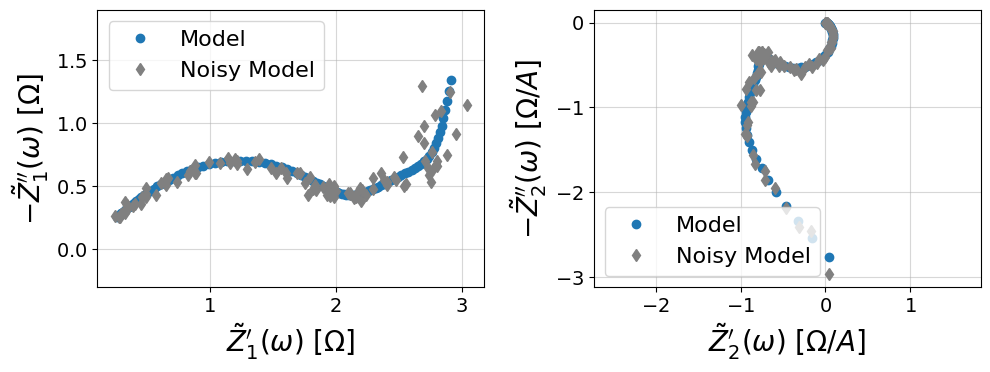

In [15]:
Rpore = 6 # Ohms (Electrolyte Resistance)
Rct = 0.6 # Ohms (Charge Transfer Resistance)
Cdl = 0.72 # F   (Double layer capacitance of the porous interface)

Aw = 2  # Bounded diffusion impedance coefficient (Ω)
tauw = 200 # Diffusion time constant (s)
k = -2.5;  # Thermodynamic parameter (V^-1)
e = 0.05 # asymmetry parameter

circuit='TDP'
initial_guess =[Rpore, Rct, Cdl, Aw, tauw]
model = CustomCircuit(circuit, initial_guess = initial_guess)
Z1p = model.predict(f)
Z1p_noise = Z_add_noise(Z1p,std=std)

circuit='TDPn'
initial_guess =[Rpore, Rct, Cdl, Aw, tauw, k, e]
model = CustomCircuit(circuit, initial_guess = initial_guess)
Z2p = model.predict(f)
Z2p_noise = Z_add_noise(Z2p,std=std)

fig,ax = plt.subplots(1,2, figsize = (10,4))
plot_first(ax[0],Z1p,fmt = 'o')
plot_first(ax[0],Z1p_noise,fmt='d',color = 'gray')
ax[0].legend(['Model','Noisy Model'])

plot_second(ax[1],Z2p,fmt = 'o')
plot_second(ax[1],Z2p_noise,fmt='d',color = 'gray')
ax[1].legend(['Model','Noisy Model'])

plt.tight_layout()
plt.show()


  0%|          | 0/20 [00:00<?, ?it/s]

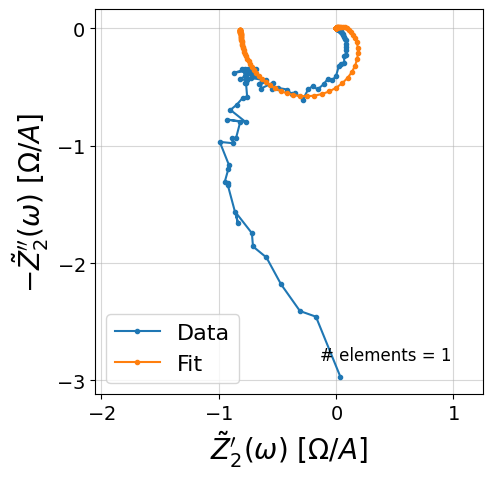

  5%|▌         | 1/20 [00:00<00:03,  6.16it/s]

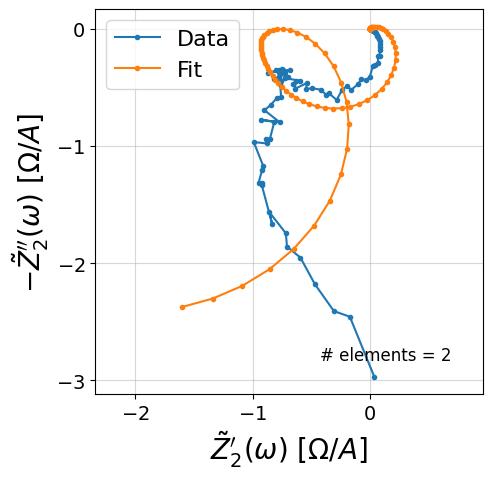

 10%|█         | 2/20 [00:00<00:02,  7.28it/s]

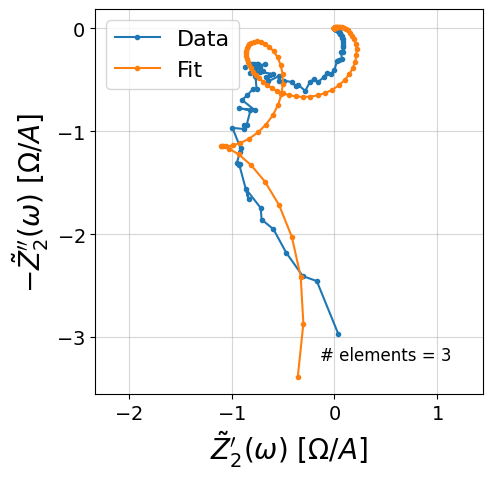

 15%|█▌        | 3/20 [00:00<00:02,  7.18it/s]

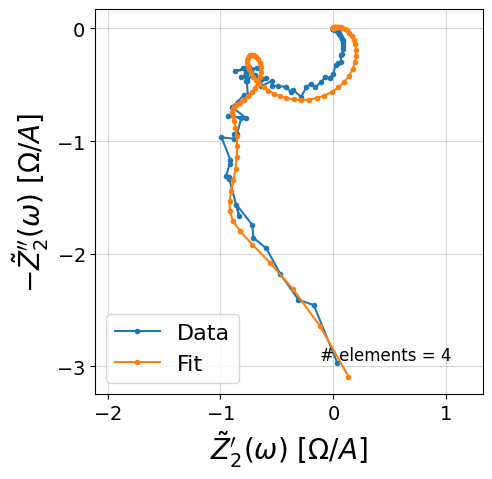

 20%|██        | 4/20 [00:00<00:02,  6.51it/s]

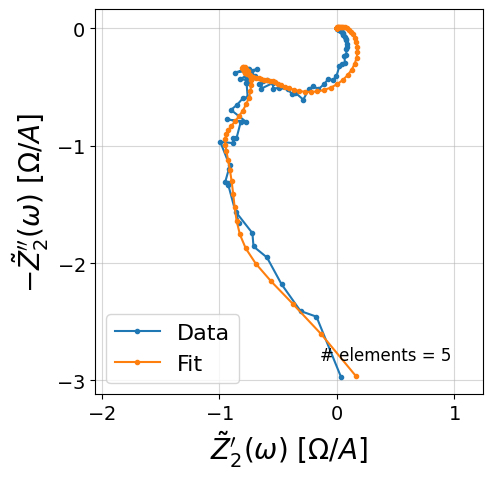

 25%|██▌       | 5/20 [00:00<00:03,  4.54it/s]

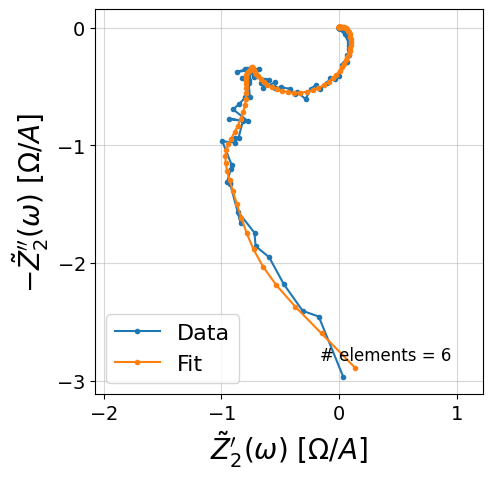

100%|██████████| 6/6 [00:01<00:00,  3.42it/s] 

Optimal solution found with M = 6


In [16]:
Zp_results_conf = MM(f,Z2p_noise,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = max_f,
                    max_M = 20, tol = 5e-4,k = 2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

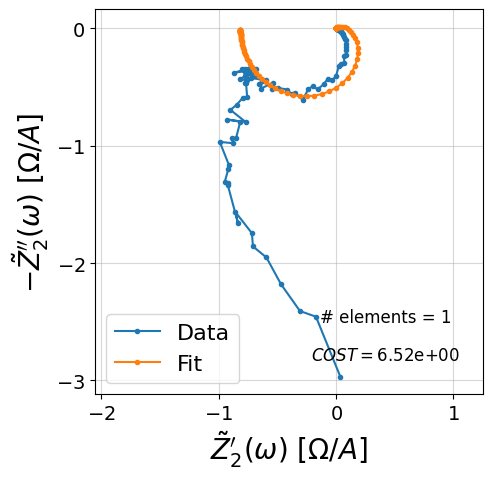

  5%|▌         | 1/20 [00:00<00:02,  9.24it/s]

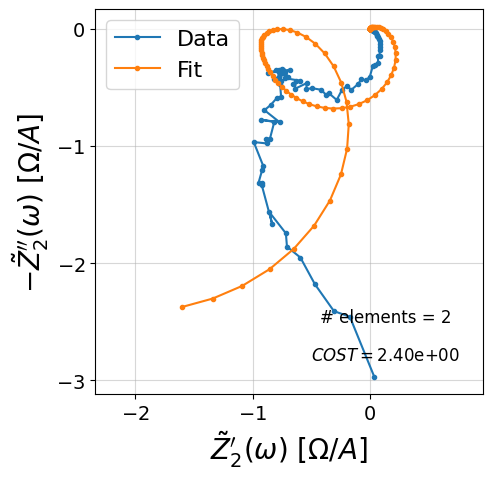

 10%|█         | 2/20 [00:00<00:02,  8.39it/s]

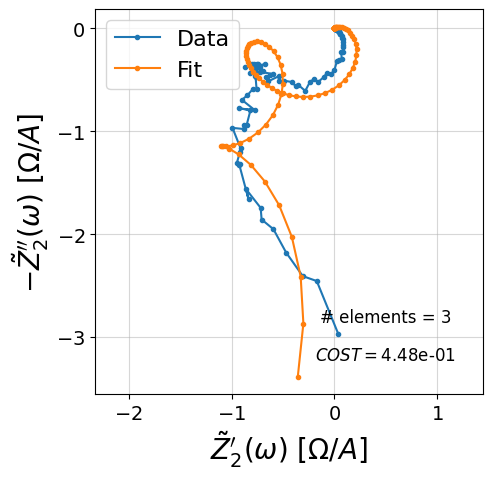

 15%|█▌        | 3/20 [00:00<00:02,  7.60it/s]

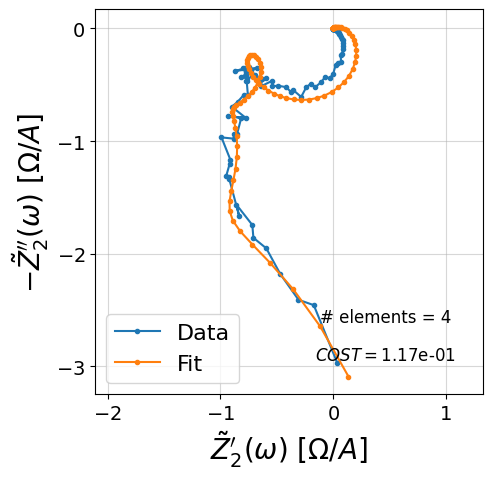

 20%|██        | 4/20 [00:00<00:02,  6.63it/s]

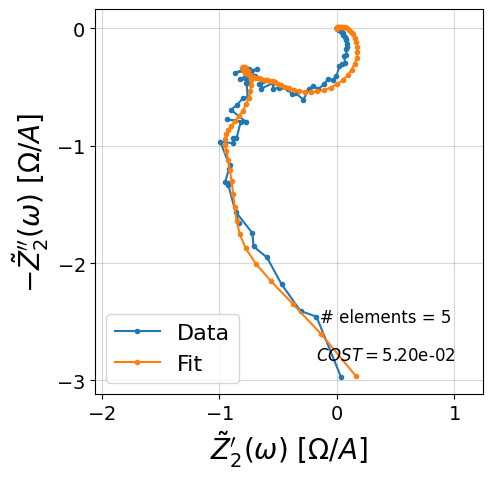

 25%|██▌       | 5/20 [00:00<00:03,  4.53it/s]

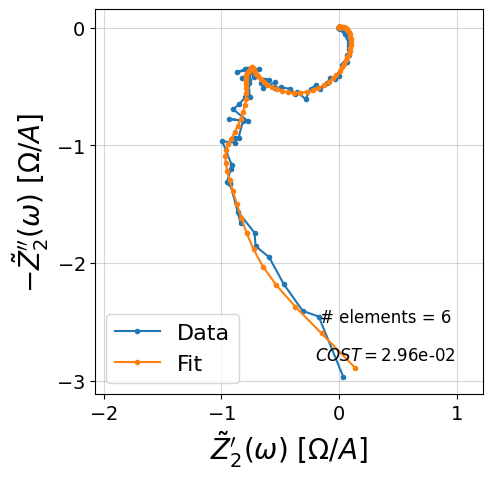

 30%|███       | 6/20 [00:01<00:03,  4.08it/s]

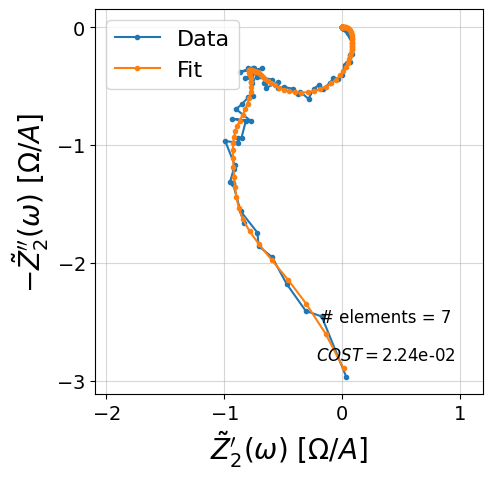

 35%|███▌      | 7/20 [00:01<00:05,  2.57it/s]

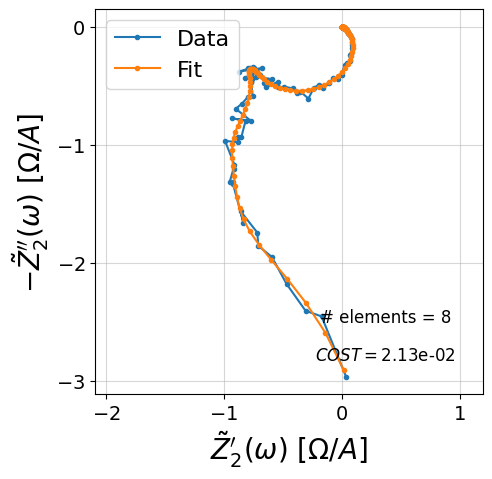

100%|██████████| 8/8 [00:09<00:00,  1.19s/it] 

Optimal solution found with M = 8


In [17]:
Zp_results_cost = MM(f,Z2p_noise,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = max_f,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

## Figure 5.

### Validation Results with Weakly Nonlinear Porous Electrode

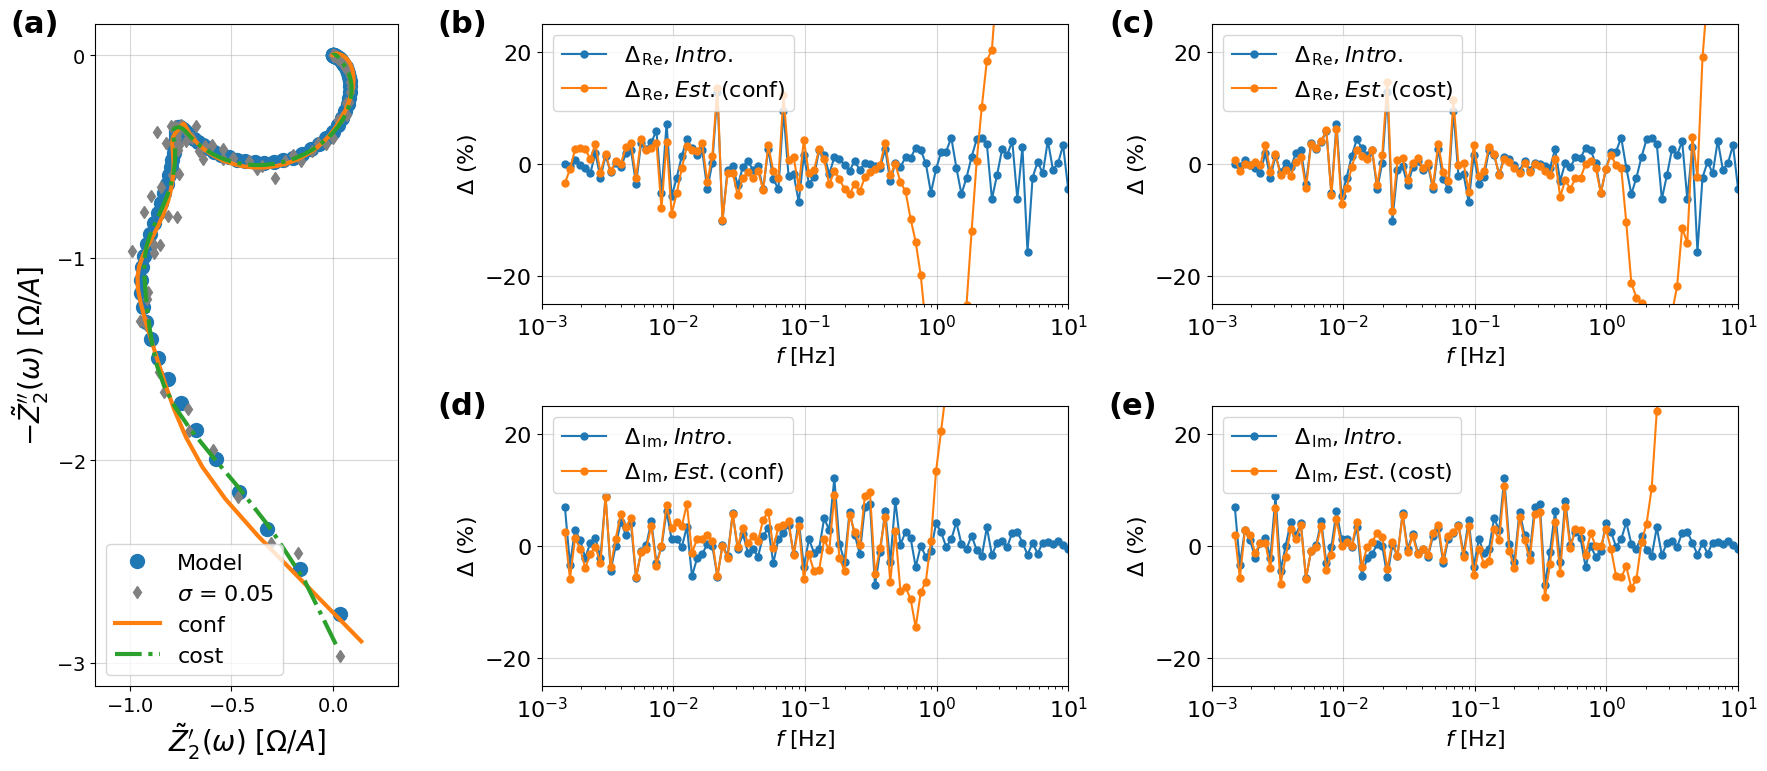

In [18]:
# initialize the figure with 5 plots
fig = plt.figure(figsize=(18, 8))

# Create a GridSpec with 2 rows and 5 columns
gs = gridspec.GridSpec(2, 8)

# First column: 1 subplots spanning 2 rows
ax1 = fig.add_subplot(gs[:, 0:2])

# Column 2-5, each plot spanning 1 row and 2 columns

ax2 = fig.add_subplot(gs[0, 2:5])
ax3 = fig.add_subplot(gs[0, 5:8])
ax4 = fig.add_subplot(gs[1, 2:5])
ax5 = fig.add_subplot(gs[1, 5:8])

# add figure number
ax1.text(-0.2, 1, '(a)',horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes, size=22, weight='bold')
ax2.text(-0.15, 1, '(b)',horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes, size=22, weight='bold')
ax3.text(-0.15, 1, '(c)',horizontalalignment='center',verticalalignment='center', transform=ax3.transAxes, size=22, weight='bold')
ax4.text(-0.15, 1, '(d)',horizontalalignment='center',verticalalignment='center', transform=ax4.transAxes, size=22, weight='bold')
ax5.text(-0.15, 1, '(e)',horizontalalignment='center',verticalalignment='center', transform=ax5.transAxes, size=22, weight='bold')

## Figure (a)
plot_second(ax1,Z2p,fmt = 'o', ms = 10)
plot_second(ax1,Z2p_noise,fmt='d', color = 'gray')
plot_second(ax1,Zp_results_conf[3],fmt='-',lw = 3, color = 'C1')
plot_second(ax1,Zp_results_cost[3],fmt='-.',lw = 3, color = 'C2')
ax1.legend(['Model','$\sigma$ = 0.05','conf','cost'],loc= 'lower left')

## Figure (b)
res_real_data = (Z2p_noise.real-Z2p.real)/abs(Z2p_noise)
res_real_CI = Zp_results_conf[4]

legend = [r'$\Delta_{\,\mathrm{Re}}, Intro.$',r'$\Delta_{\,\mathrm{Re}}, Est.$(conf)']
residual_plot(ax2, f, res_real_data, res_real_CI, xlim = [1e-3,10], ylim = [-25,25], fontsize = 16, legend = legend)

## Figure (c)
res_real_cost = Zp_results_cost[4]
legend = [r'$\Delta_{\,\mathrm{Re}}, Intro.$',r'$\Delta_{\,\mathrm{Re}}, Est.$(cost)']
residual_plot(ax3, f, res_real_data, res_real_cost, xlim = [1e-3,10], ylim = [-25,25], fontsize = 16, legend = legend)

## Figure (d)
res_imag_data = (Z2p_noise.imag-Z2p.imag)/abs(Z2p_noise)
res_imag_CI = Zp_results_conf[5]

legend = [r'$\Delta_{\,\mathrm{Im}}, Intro.$',r'$\Delta_{\,\mathrm{Im}}, Est.$(conf)']

residual_plot(ax4, f, res_imag_data, res_imag_CI, xlim = [1e-3,10], ylim = [-25,25], fontsize = 16, legend = legend)

## Figure (e)
res_imag_cost = Zp_results_cost[5]

legend = [r'$\Delta_{\,\mathrm{Im}}, Intro.$',r'$\Delta_{\,\mathrm{Im}}, Est.$(cost)']

residual_plot(ax5, f, res_imag_data, res_imag_cost, xlim = [1e-3,10], ylim = [-25,25], fontsize = 16, legend = legend)

plt.tight_layout()
plt.show()


In [19]:
# fig.savefig('figures/Figure5.png',dpi=300,bbox_inches='tight')

## Experimental data Extracted from Three Different Amplitudes (18650 Cell)

In [20]:
f_30a = np.loadtxt('data/18650/freq_30a.txt')
Z1s_30a = np.loadtxt('data/18650/Z1s_30a.txt').view(complex)[1]
Z2s_30a = np.loadtxt('data/18650/Z2s_30a.txt').view(complex)[1]

In [21]:
mask = Z1s_30a.imag<0
f1 = f_30a[mask]
Z1 = Z1s_30a[mask]

mask = f_30a<10
f2 = f_30a[mask]
Z2 = Z2s_30a[mask]

### LinKK

In [22]:
M, mu, Z_linKK, LinKK_res_real, LinKK_res_imag = linKK(f1, Z1, c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 5.4430402823179183e-05
20 1.0 3.093981966954374e-05


  0%|          | 0/20 [00:00<?, ?it/s]

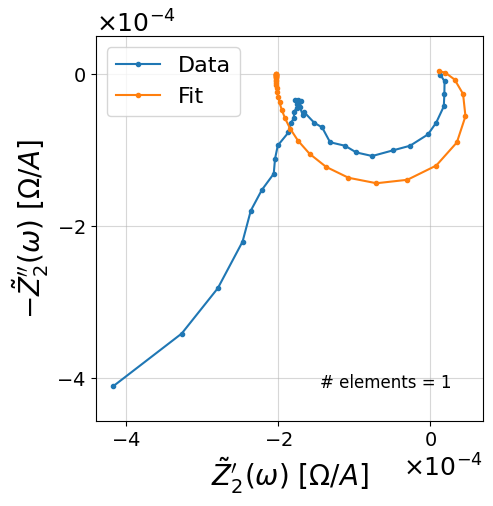

  5%|▌         | 1/20 [00:00<00:02,  9.09it/s]

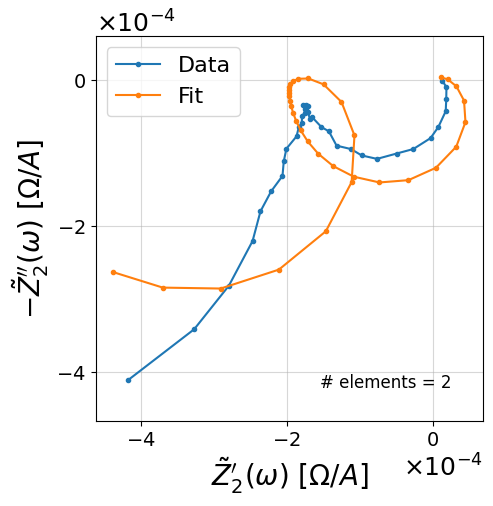

 10%|█         | 2/20 [00:00<00:02,  8.62it/s]

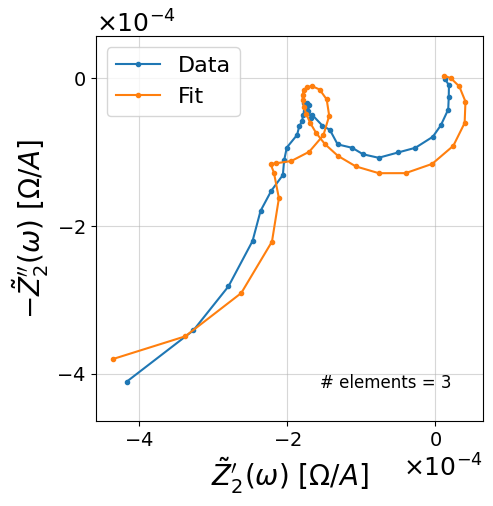

 15%|█▌        | 3/20 [00:00<00:02,  6.50it/s]

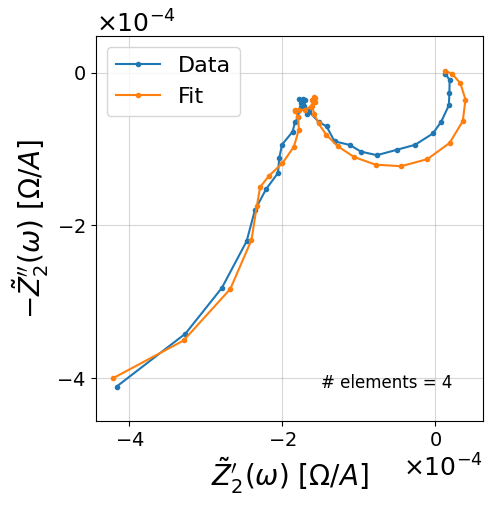

 20%|██        | 4/20 [00:00<00:02,  6.57it/s]

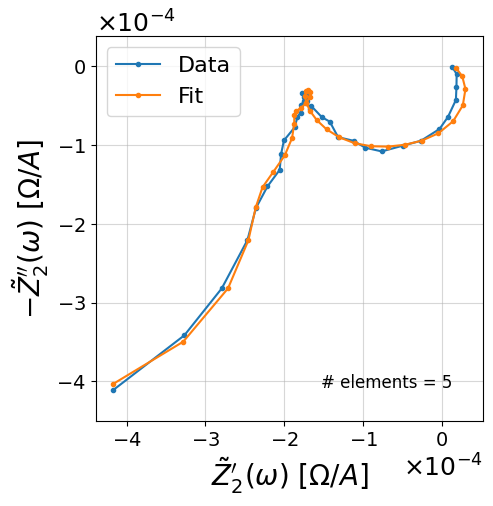

 25%|██▌       | 5/20 [00:00<00:02,  6.86it/s]

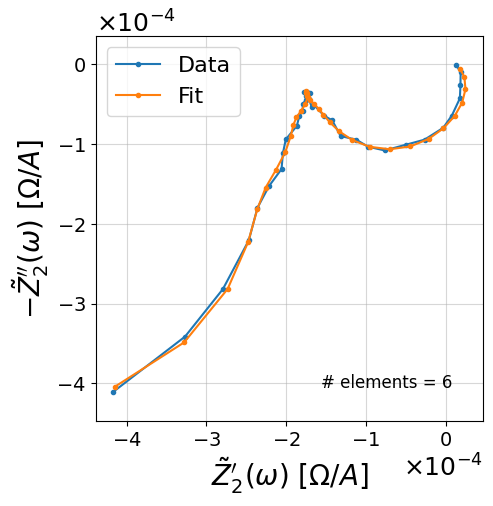

100%|██████████| 6/6 [00:00<00:00,  6.12it/s] 

Optimal solution found with M = 6


In [23]:
data_results_conf = MM(f2,Z2,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = np.inf,
                    max_M = 20, tol = 5e-4,k = 2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

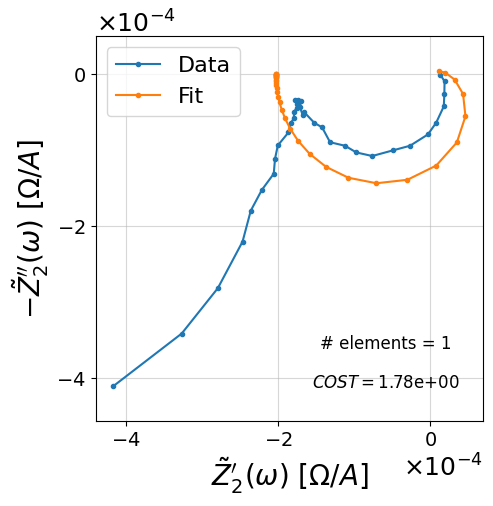

  5%|▌         | 1/20 [00:00<00:02,  9.34it/s]

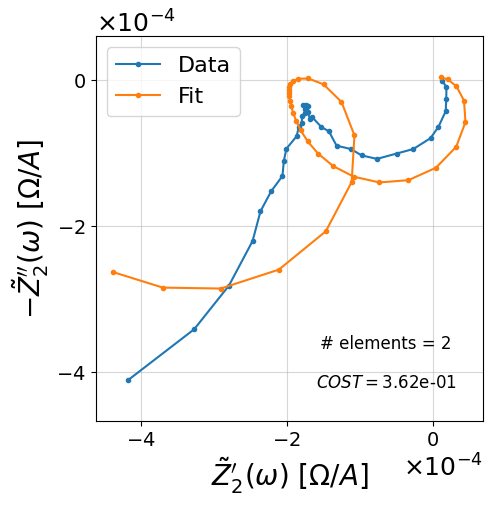

 10%|█         | 2/20 [00:00<00:02,  8.96it/s]

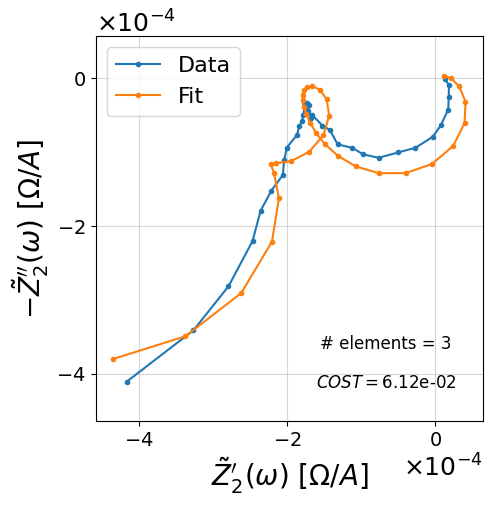

 15%|█▌        | 3/20 [00:00<00:02,  8.31it/s]

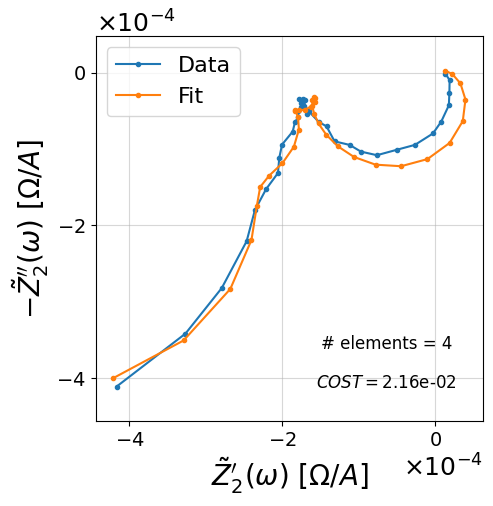

 20%|██        | 4/20 [00:00<00:02,  7.46it/s]

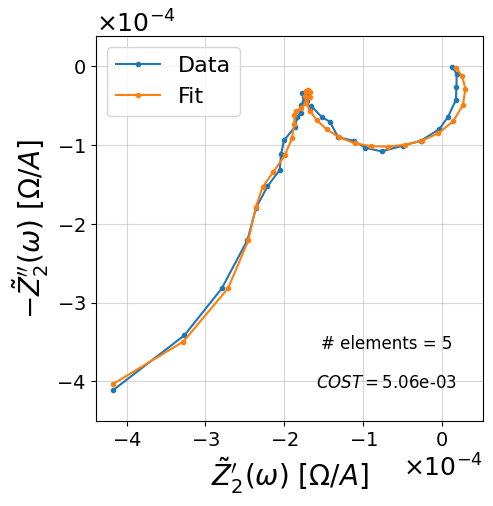

 25%|██▌       | 5/20 [00:00<00:02,  7.33it/s]

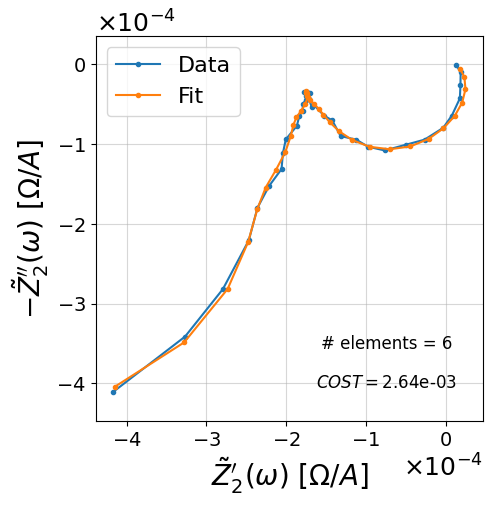

 30%|███       | 6/20 [00:00<00:02,  6.90it/s]

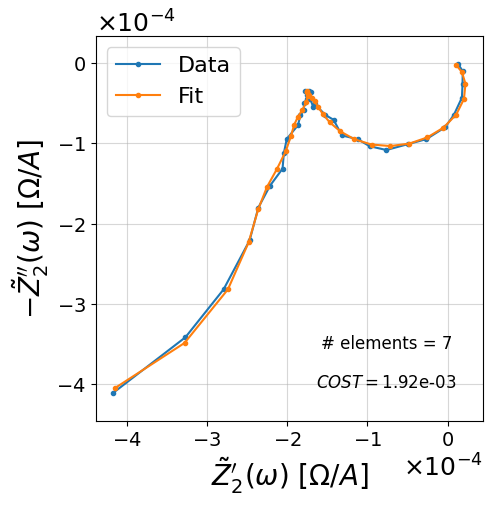

100%|██████████| 7/7 [00:01<00:00,  6.11it/s] 

Optimal solution found with M = 7


In [24]:
data_results_cost = MM(f2,Z2,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = np.inf,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

## Figure 6.
### Kramers-Kronig Test for Extracted EIS and 2nd-NLEIS (18650 Cell)

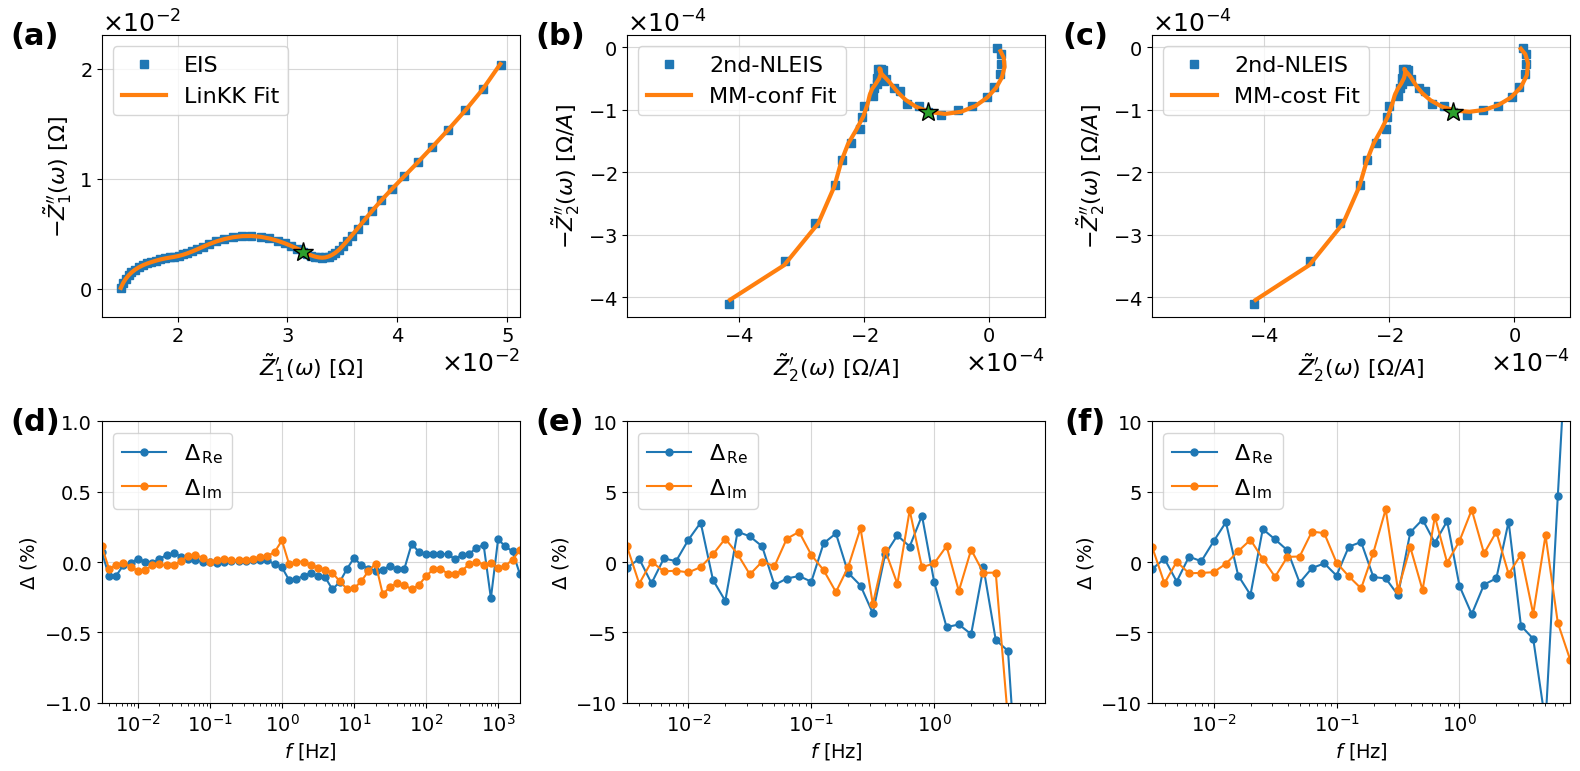

In [25]:
# initialize the figure with 5 plots
fig, ax = plt.subplots(2,3, figsize=(16, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')


# Figure (a)

plot_first(ax[0,0], Z1, fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z_linKK, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,0], Z1[f1==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,0].legend(['EIS', 'LinKK Fit'], loc=2, fontsize=fontsize)

# Figure (b)

plot_second(ax[0,1], Z2, fmt='s',labelsize=fontsize)
plot_second(ax[0,1], data_results_conf[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2[f2==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,1].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)
ax[0,1].set_xlim([-5e-4,1e-5])

# Figure (c)

plot_second(ax[0,2], Z2, fmt='s',labelsize=fontsize)
plot_second(ax[0,2], data_results_cost[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,2], Z2[f2==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,2].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)
ax[0,2].set_xlim([-5e-4,1e-5])

# Figure (d)

plot_residuals(ax[1,0], f1, LinKK_res_real, LinKK_res_imag, y_limits=(-1,1), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (e)
Z2_conf_res_real = data_results_conf[4]
Z2_conf_res_imag = data_results_conf[5]

plot_residuals(ax[1,1], f2, Z2_conf_res_real, Z2_conf_res_imag, y_limits=(-10,10), ms =10)
ax[1,1].legend(loc = 'upper left')

# Figure (f)
Z2_cost_res_real = data_results_cost[4]
Z2_cost_res_imag = data_results_cost[5]

plot_residuals(ax[1,2], f2, Z2_cost_res_real, Z2_cost_res_imag, y_limits=(-10,10), ms =10)
ax[1,2].legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [26]:
# fig.savefig('figures/Figure6.png',dpi=300,bbox_inches='tight')

## Individual result for 0.3 A, 0.4 A, and 0.5 A

In [27]:
def individual_data(directory,plot_SoC,plot_amplitudes):
    filenames, order = [], []
    frequencies = []

    for filename in os.listdir(directory):
        if filename.startswith(str(plot_SoC)):
            data = np.genfromtxt(directory + filename, delimiter=',', skip_header=1)
            frequency, amplitude = data[0,3], data[0,4]
            
            if amplitude in plot_amplitudes:
                filenames.append(filename)
                frequencies.append(frequency)
                
    filenames_to_use = [f for _,f in sorted(zip(frequencies,filenames))]
    frequencies_to_use = [f for _,f in sorted(zip(frequencies,frequencies))]
    I_dict = {}
    V_dict = {}
    freq, Z1, Z2 = [], [], []
    thd_I, thd_V = [], []
    I_keys = [f'I{i+1},[A]' for i in range(10)]
    V_keys = [f'V{i+1},[V]' for i in range(10)]
    for f, filename in zip(frequencies_to_use, filenames_to_use):
        df = pd.read_csv(directory+filename)

        # I_dict[f], V_dict[f] = fft_data(df, rtol=5e-5,max_k=10, f = df['Frequency (Hz)'][0],freq_domain_visual = False,
        #                                 phase_correction=False,baseline=False)
        I_dict[f], V_dict[f] = fft_data(df, rtol=5e-5,max_k=10, f = df['Frequency (Hz)'][0],freq_domain_visual = False,
                                        phase_correction=True,baseline=True)
        freq.append(df['Frequency (Hz)'][0])
        I = I_dict[f]['I1']
        Z1.append(V_dict[f]['V1']/I)
        Z2.append(V_dict[f]['V2']/I**2)
        I_k = np.array(list(I_dict[f].values())).flatten()
        V_k = np.array(list(V_dict[f].values())).flatten()
        thd_I.append(np.sum(abs(I_k[1:])**2)**0.5/abs(I_k[0]))
        thd_V.append(np.sum(abs(V_k[1:])**2)**0.5/abs(V_k[0]))
    return (np.array(freq),np.squeeze(Z1),np.squeeze(Z2)-4.56e-5, np.array(thd_I), np.array(thd_V))

In [28]:
f_0p3A, Z1_0p3A, Z2_0p3A, thd_I_0p3A, thd_V_0p3A =individual_data(directory= 'data/cell_5/',plot_SoC = 30,plot_amplitudes = [0.3])
f_0p4A, Z1_0p4A, Z2_0p4A, thd_I_0p4A, thd_V_0p4A =individual_data(directory= 'data/cell_5/',plot_SoC = 30,plot_amplitudes = [0.4])
f_0p5A, Z1_0p5A, Z2_0p5A, thd_I_0p5A, thd_V_0p5A =individual_data(directory= 'data/cell_5/',plot_SoC = 30,plot_amplitudes = [0.5])

### Figure S3.
#### THD of 18650 Cell

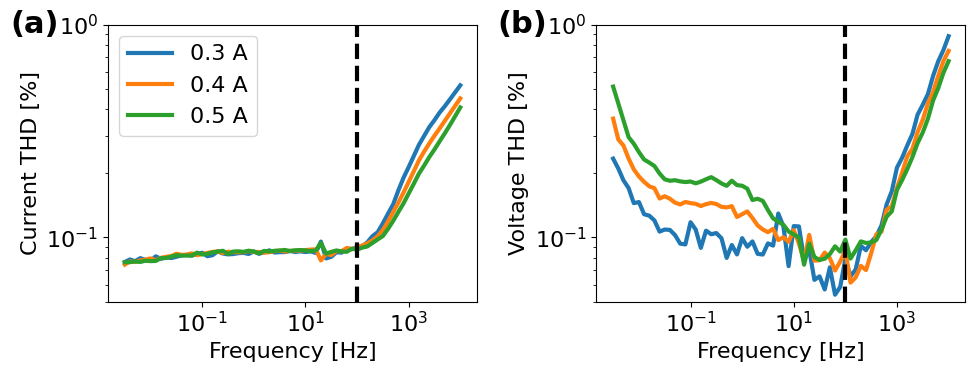

In [29]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.2, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

ax[0].loglog(f_0p3A,thd_I_0p3A*100, lw = 3)
ax[0].loglog(f_0p4A,thd_I_0p4A*100, lw = 3)
ax[0].loglog(f_0p5A,thd_I_0p5A*100, lw = 3)
ax[0].axvline(x=100, color='black', linestyle='--', lw =3 )


ax[0].legend(['0.3 A','0.4 A', '0.5 A'],fontsize = fontsize)
ax[0].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[0].set_ylabel('Current THD [%]',fontsize = fontsize)
ax[0].set_ylim([5e-2,1])

ax[1].loglog(f_0p3A,thd_V_0p3A*100, lw = 3)
ax[1].loglog(f_0p4A,thd_V_0p4A*100, lw = 3)
ax[1].loglog(f_0p5A,thd_V_0p5A*100, lw = 3)
ax[1].axvline(x=100, color='black', linestyle='--', lw =3 )

ax[1].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[1].set_ylabel('Voltage THD [%]',fontsize = fontsize)
ax[1].set_ylim([5e-2,1])

plt.tight_layout()
plt.show()

In [30]:
# fig.savefig('figures/SI/FigureS3.png',dpi=300,bbox_inches='tight')

### Figure S4.
#### EIS and 2nd-NLEIS Data for 18650 Cell with 0.3, 0.4, 0.5 A Perturbation

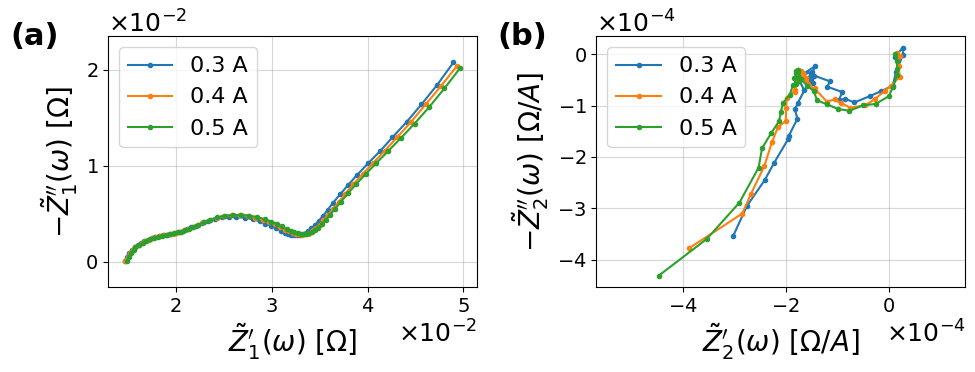

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.2, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

plot_first(ax[0], Z1_0p3A[Z1_0p3A.imag<0])
plot_first(ax[0], Z1_0p4A[Z1_0p4A.imag<0])
plot_first(ax[0], Z1_0p5A[Z1_0p5A.imag<0])


ax[0].legend(['0.3 A','0.4 A', '0.5 A'],fontsize = fontsize)

plot_second(ax[1], Z2_0p3A[f_0p3A<10])
plot_second(ax[1], Z2_0p4A[f_0p4A<10])
plot_second(ax[1], Z2_0p5A[f_0p5A<10])

ax[1].legend(['0.3 A','0.4 A', '0.5 A'],fontsize = fontsize)

plt.tight_layout()
plt.show()

In [32]:
# fig.savefig('figures/SI/FigureS4.png',dpi=300,bbox_inches='tight')

### Figure S5.
### LinKK Results for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation

In [33]:
mask_0p3A = Z1_0p3A.imag < 0
M, mu, Z_linKK_0p3A, res_real_0p3A, res_imag_0p3A = linKK(f_0p3A[mask_0p3A], Z1_0p3A[mask_0p3A], c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 5.3372036676972044e-05
20 0.9990069926185035 4.0051203351139665e-05


In [34]:
mask_0p4A = Z1_0p4A.imag < 0

M, mu, Z_linKK_0p4A, res_real_0p4A, res_imag_0p4A = linKK(f_0p4A[mask_0p4A], Z1_0p4A[mask_0p4A], c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 6.887044961518347e-05
20 1.0 4.286205491229053e-05


In [35]:
mask_0p5A = Z1_0p5A.imag < 0

M, mu, Z_linKK_0p5A, res_real_0p5A, res_imag_0p5A = linKK(f_0p5A[mask_0p5A], Z1_0p5A[mask_0p5A], c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 5.7281795831059726e-05
20 1.0 3.560223796182532e-05


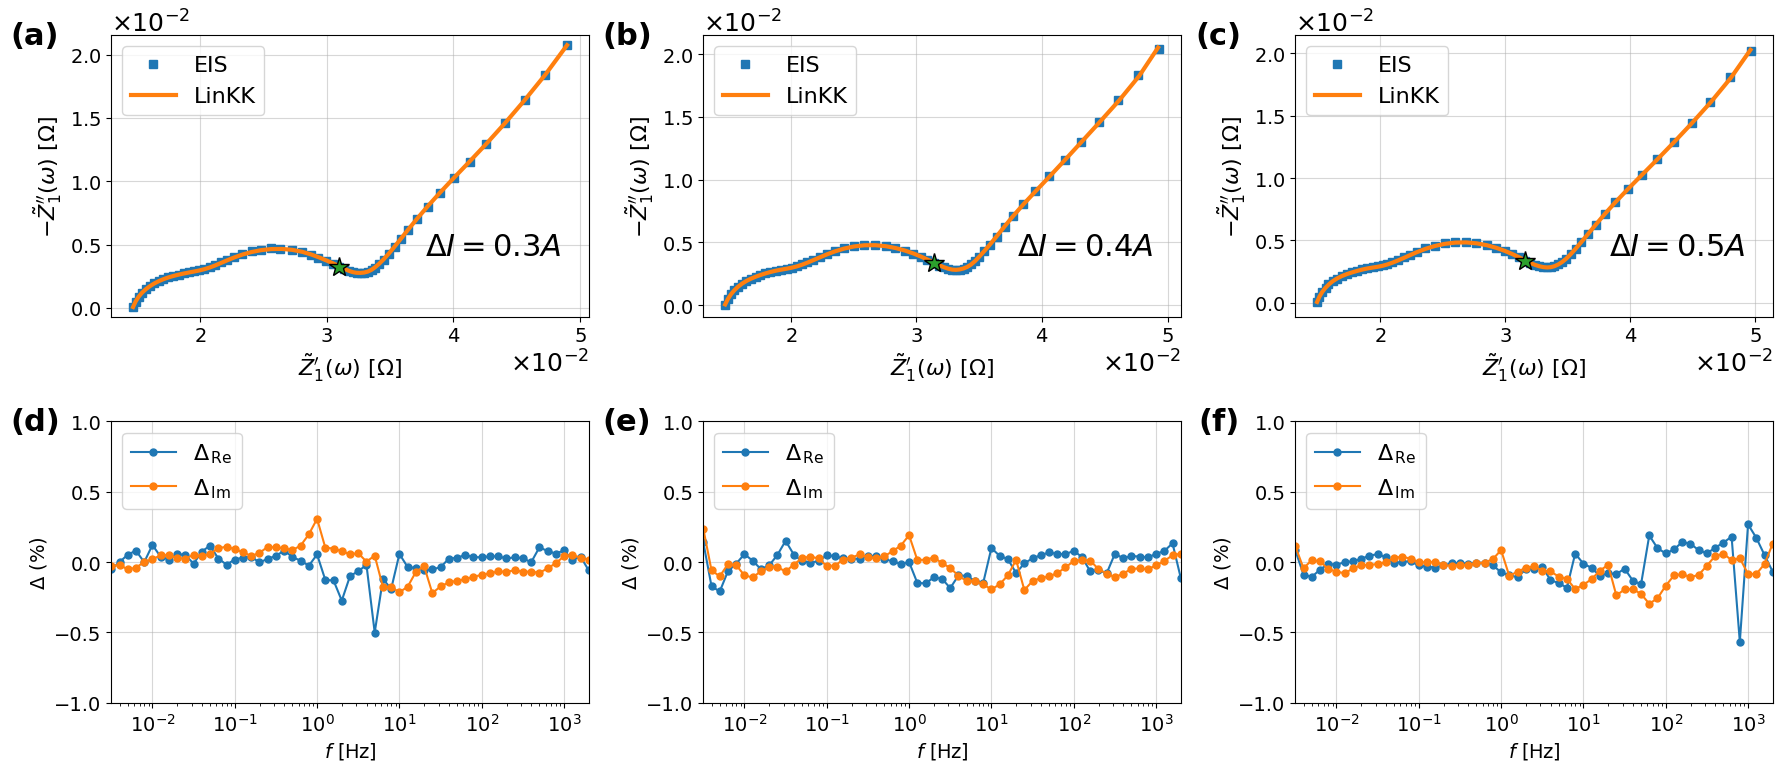

In [36]:
lb = -1
ub = 1

fig, ax = plt.subplots(2,3, figsize=(18, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_first(ax[0,0], Z1_0p3A[mask_0p3A], fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z_linKK_0p3A, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,0], Z1_0p3A[f_0p3A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,0].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)
ax[0,0].text(0.8, 0.25, '$\Delta I = 0.3 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22)

# Figure (b)

plot_first(ax[0,1], Z1_0p4A[mask_0p4A], fmt='s',labelsize=fontsize)
plot_first(ax[0,1], Z_linKK_0p4A, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,1], Z1_0p4A[f_0p4A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,1].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)
ax[0,1].text(0.8, 0.25, '$\Delta I = 0.4 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22)

# Figure (c)

plot_first(ax[0,2], Z1_0p5A[mask_0p5A], fmt='s',labelsize=fontsize)
plot_first(ax[0,2], Z_linKK_0p5A, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,2], Z1_0p5A[f_0p5A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,2].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)
ax[0,2].text(0.8, 0.25, '$\Delta I = 0.5 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,2].transAxes, size=22)

# Figure (d)

plot_residuals(ax[1,0], f_0p3A[mask_0p3A], res_real_0p3A, res_imag_0p3A, y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (e)

plot_residuals(ax[1,1], f_0p4A[mask_0p4A], res_real_0p4A, res_imag_0p4A, y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')

# Figure (f)
plot_residuals(ax[1,2], f_0p5A[mask_0p5A], res_real_0p5A, res_imag_0p5A, y_limits=(lb,ub), ms =10)
ax[1,2].legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [37]:
# fig.savefig('figures/SI/FigureS5.png',dpi=300,bbox_inches='tight')

## Figure 7.
### Measurement Model Test for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation (cost method)

  0%|          | 0/20 [00:00<?, ?it/s]

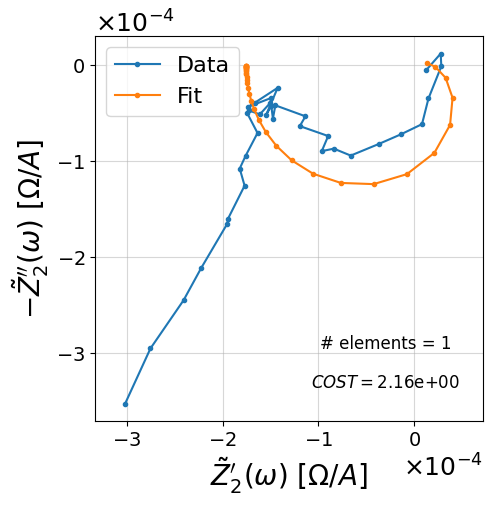

  5%|▌         | 1/20 [00:00<00:02,  9.14it/s]

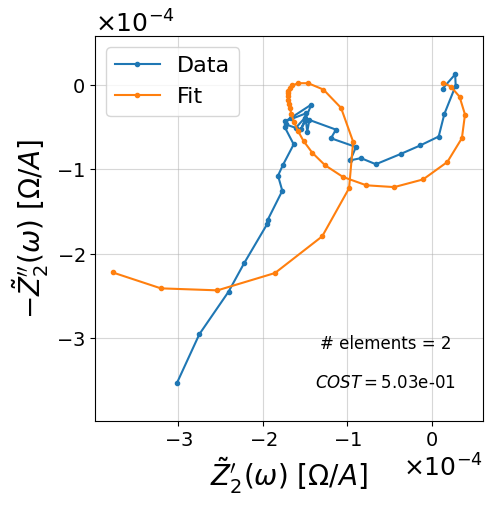

 10%|█         | 2/20 [00:00<00:02,  8.52it/s]

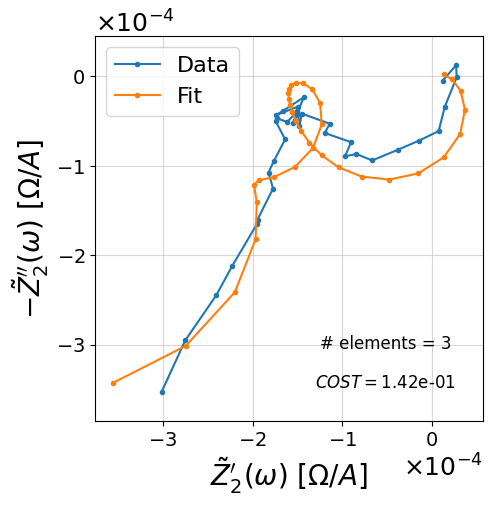

 15%|█▌        | 3/20 [00:00<00:02,  7.96it/s]

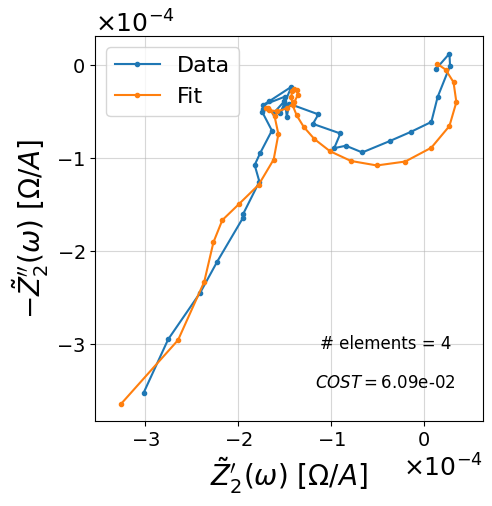

 20%|██        | 4/20 [00:00<00:02,  7.22it/s]

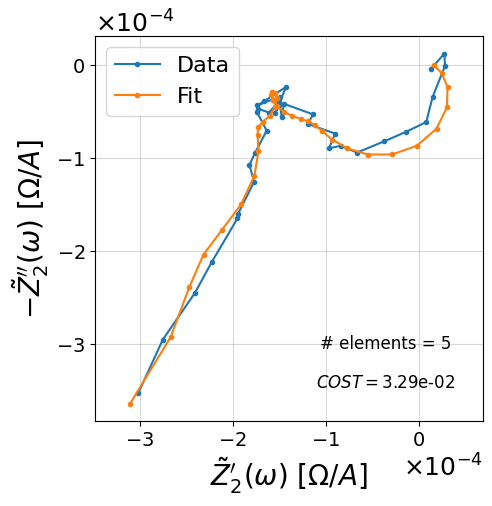

 25%|██▌       | 5/20 [00:00<00:02,  6.90it/s]

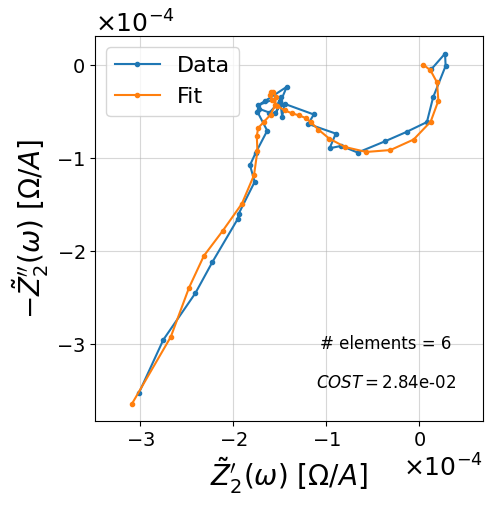

100%|██████████| 6/6 [00:00<00:00,  6.09it/s] 

Optimal solution found with M = 6


In [38]:
results_cost_0p3A = MM(f_0p3A,Z2_0p3A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

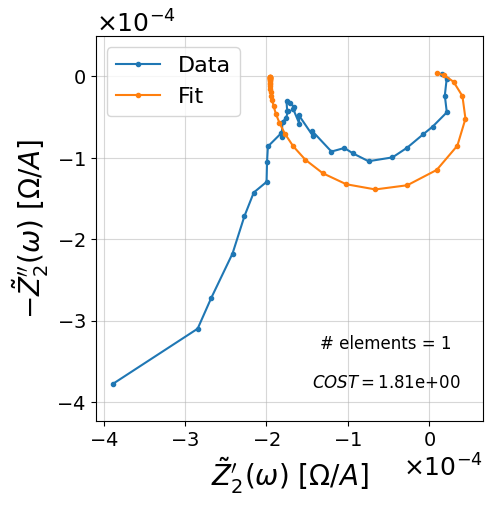

  5%|▌         | 1/20 [00:00<00:02,  8.54it/s]

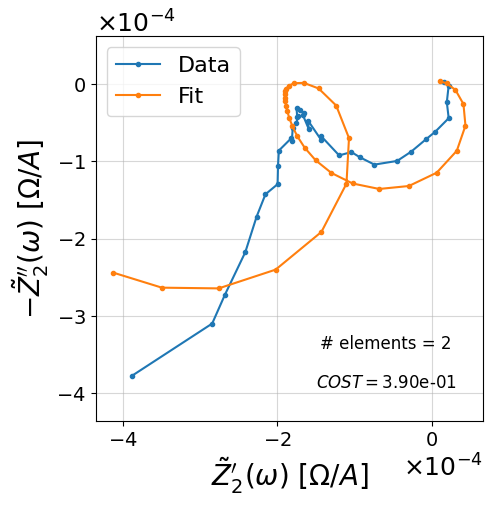

 10%|█         | 2/20 [00:00<00:02,  8.29it/s]

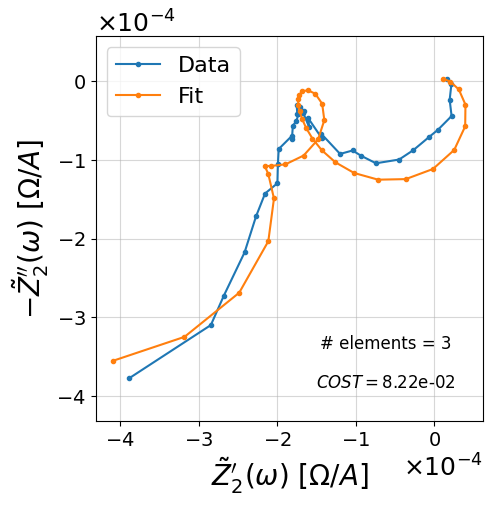

 15%|█▌        | 3/20 [00:00<00:02,  7.93it/s]

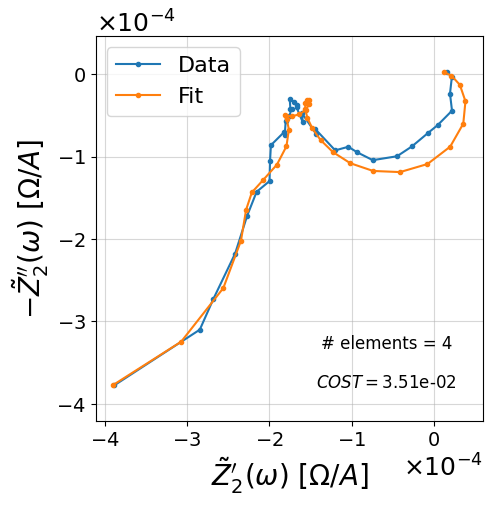

 20%|██        | 4/20 [00:00<00:02,  6.56it/s]

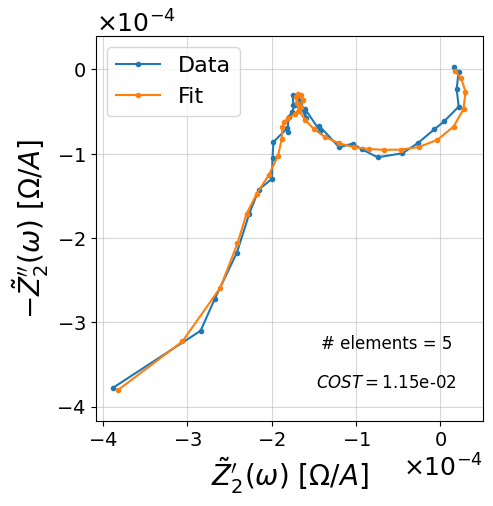

 25%|██▌       | 5/20 [00:00<00:02,  6.77it/s]

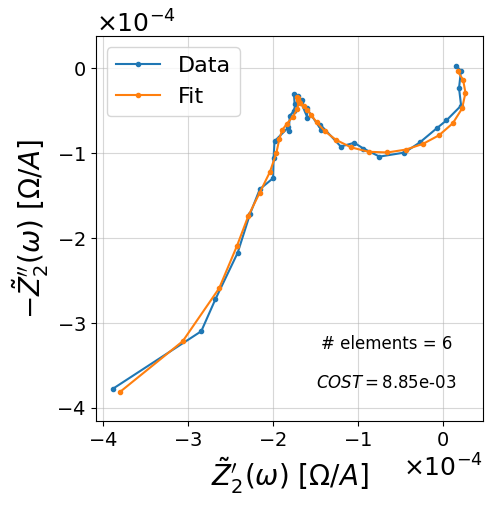

 30%|███       | 6/20 [00:00<00:02,  5.51it/s]

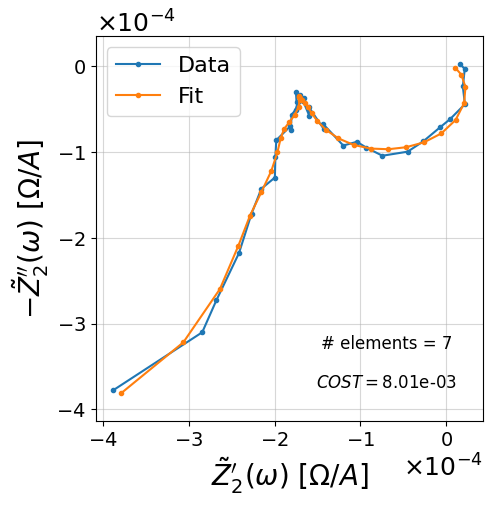

100%|██████████| 7/7 [00:01<00:00,  5.41it/s] 

Optimal solution found with M = 7


In [39]:
results_cost_0p4A = MM(f_0p4A,Z2_0p4A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

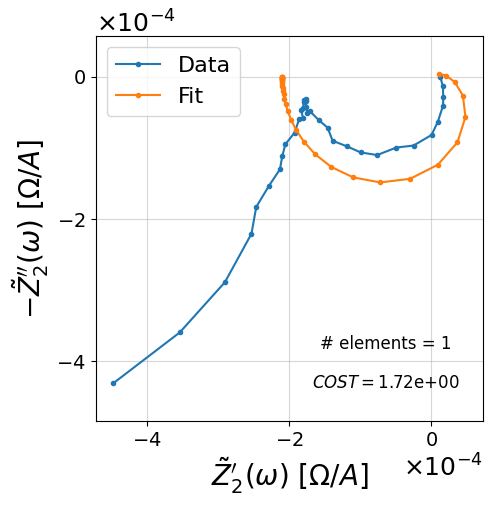

  5%|▌         | 1/20 [00:00<00:01,  9.74it/s]

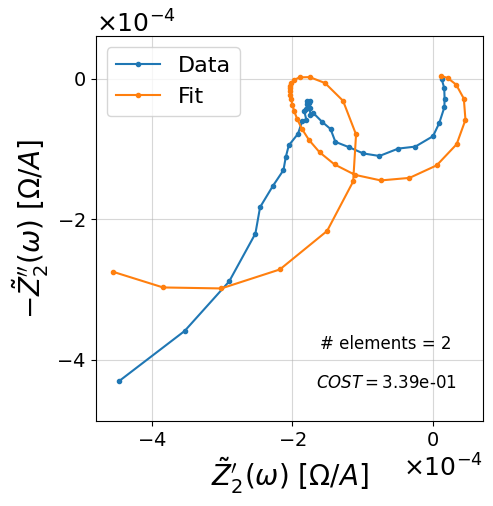

 10%|█         | 2/20 [00:00<00:01,  9.06it/s]

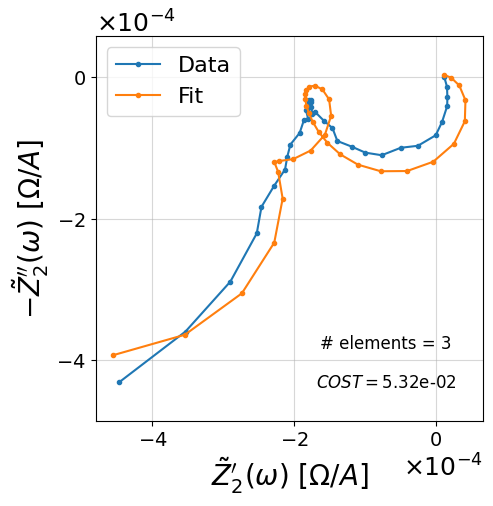

 15%|█▌        | 3/20 [00:00<00:01,  8.70it/s]

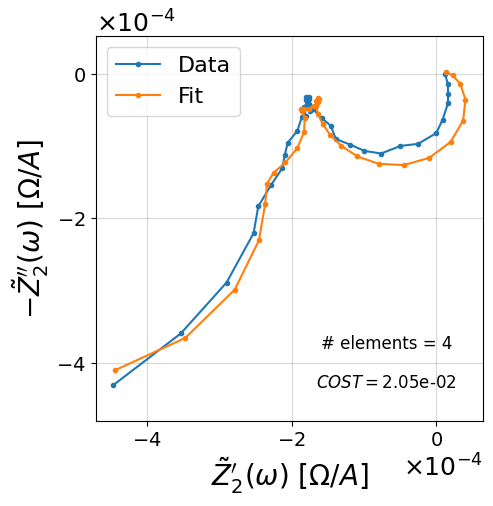

 20%|██        | 4/20 [00:00<00:02,  7.54it/s]

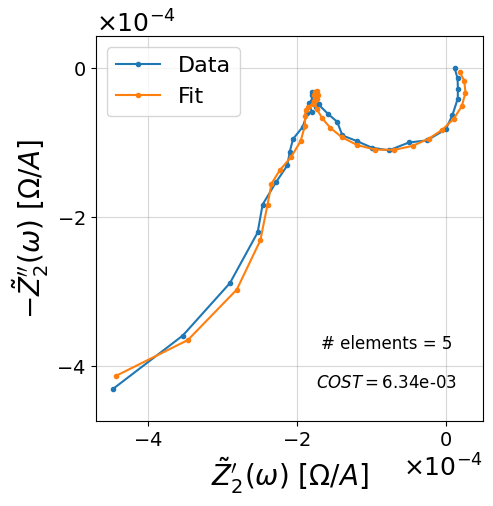

 25%|██▌       | 5/20 [00:00<00:01,  7.54it/s]

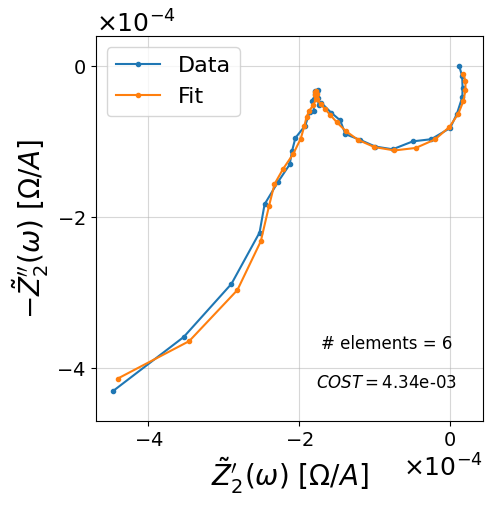

 30%|███       | 6/20 [00:00<00:01,  7.01it/s]

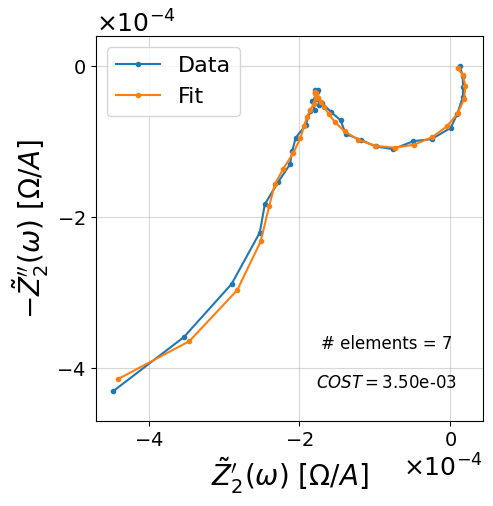

100%|██████████| 7/7 [00:01<00:00,  6.59it/s] 

Optimal solution found with M = 7


In [40]:
results_cost_0p5A = MM(f_0p5A,Z2_0p5A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'cost', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

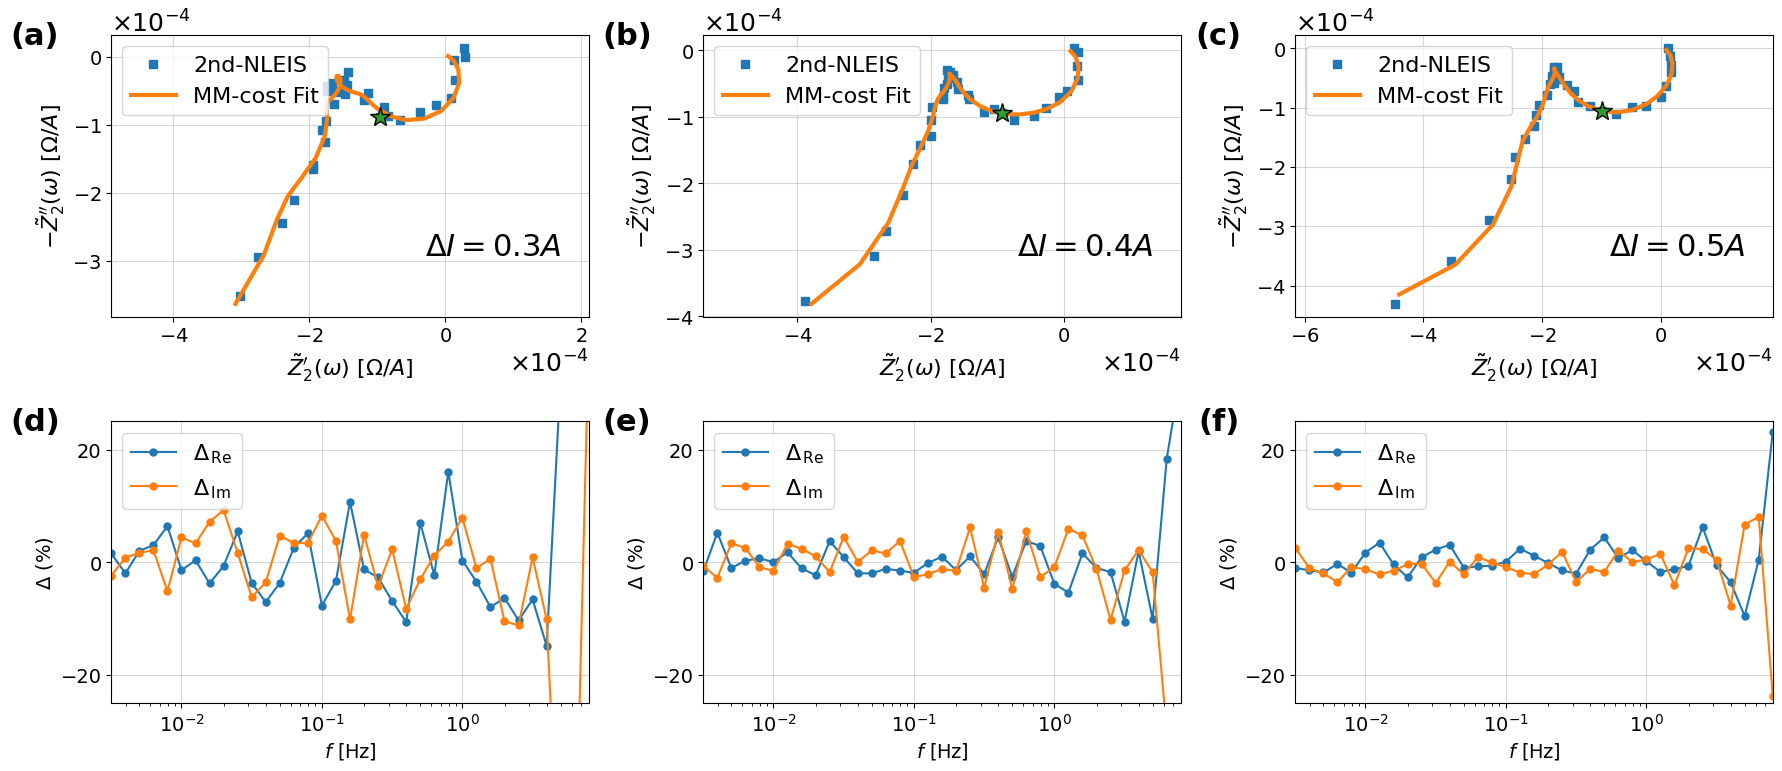

In [41]:
lb = -25
ub = 25

fig, ax = plt.subplots(2,3, figsize=(18, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
mask = f_0p3A<10
plot_second(ax[0,0], Z2_0p3A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,0],results_cost_0p3A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,0], Z2_0p3A[f_0p3A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,0].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)
ax[0,0].text(0.8, 0.25, '$\Delta I = 0.3 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22)

# Figure (b)

plot_second(ax[0,1], Z2_0p4A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,1],results_cost_0p4A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2_0p4A[f_0p4A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,1].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)
ax[0,1].text(0.8, 0.25, '$\Delta I = 0.4 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22)

# Figure (c)

plot_second(ax[0,2], Z2_0p5A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,2],results_cost_0p5A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,2], Z2_0p5A[f_0p5A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,2].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)
ax[0,2].text(0.8, 0.25, '$\Delta I = 0.5 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,2].transAxes, size=22)

# Figure (d)

plot_residuals(ax[1,0], f_0p3A[f_0p3A<10], results_cost_0p3A[4], results_cost_0p3A[5], y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (e)

plot_residuals(ax[1,1], f_0p4A[f_0p4A<10], results_cost_0p4A[4], results_cost_0p4A[5], y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')

# Figure (f)

plot_residuals(ax[1,2], f_0p5A[f_0p5A<10], results_cost_0p5A[4], results_cost_0p5A[5], y_limits=(lb,ub), ms =10)
ax[1,2].legend(loc = 'upper left')


plt.tight_layout()
plt.show()

In [42]:
# fig.savefig('figures/Figure7.png',dpi=300,bbox_inches='tight')

### Figure S6.
#### Measurement Model Test for 18650 Cell Collected with 0.3, 0.4, 0.5 A Perturbation (conf method)

  0%|          | 0/20 [00:00<?, ?it/s]

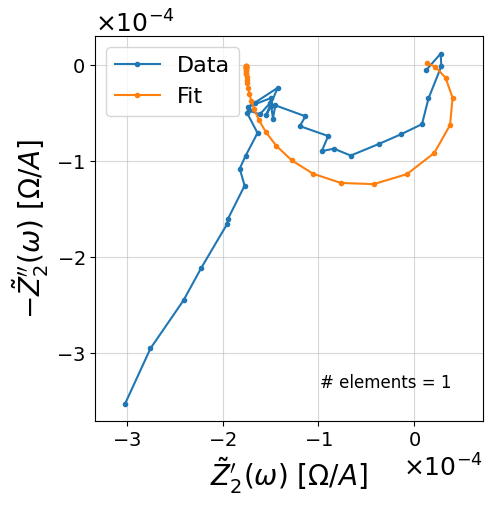

  5%|▌         | 1/20 [00:00<00:01,  9.76it/s]

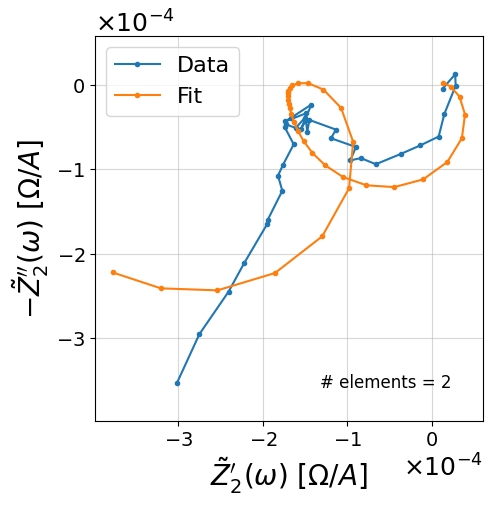

 10%|█         | 2/20 [00:00<00:01,  9.07it/s]

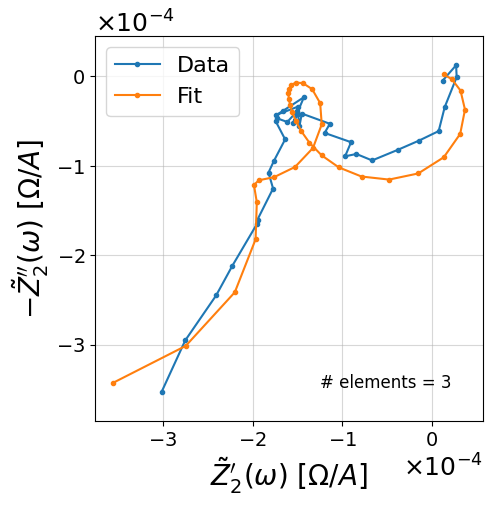

 15%|█▌        | 3/20 [00:00<00:02,  8.49it/s]

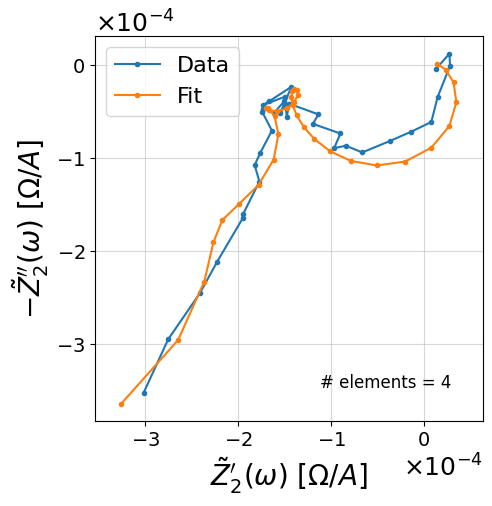

 20%|██        | 4/20 [00:00<00:02,  7.49it/s]

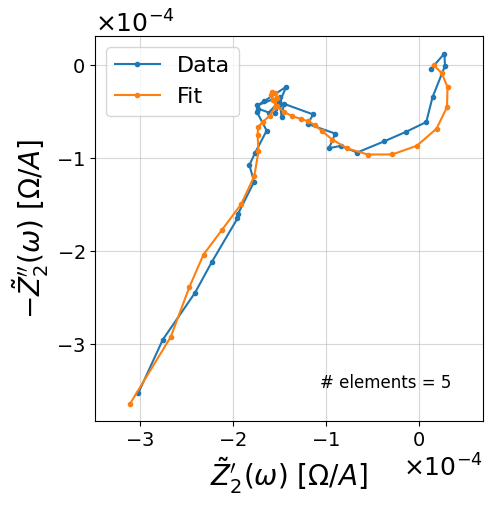

100%|██████████| 5/5 [00:00<00:00,  6.78it/s] 

Optimal solution found with M = 5


In [43]:
results_conf_0p3A = MM(f_0p3A,Z2_0p3A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

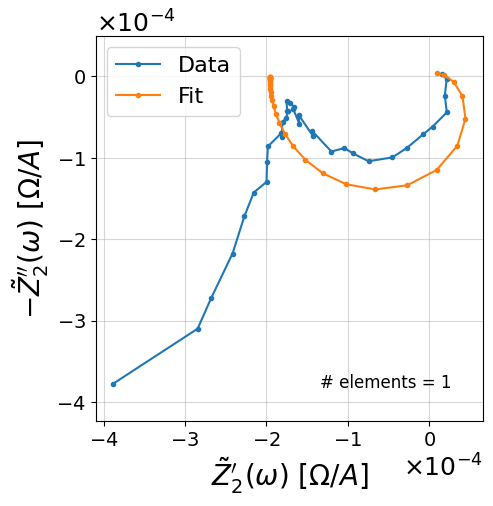

  5%|▌         | 1/20 [00:00<00:02,  8.89it/s]

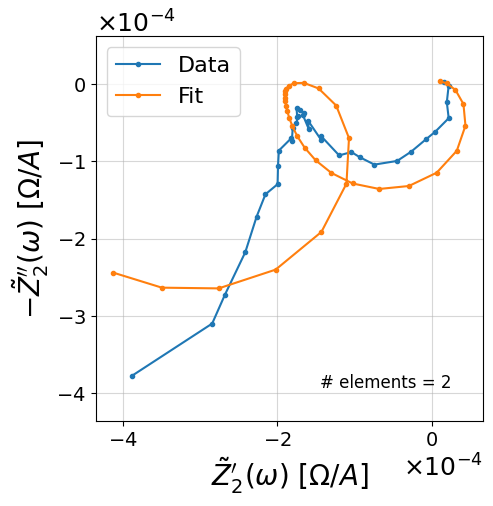

 10%|█         | 2/20 [00:00<00:02,  8.65it/s]

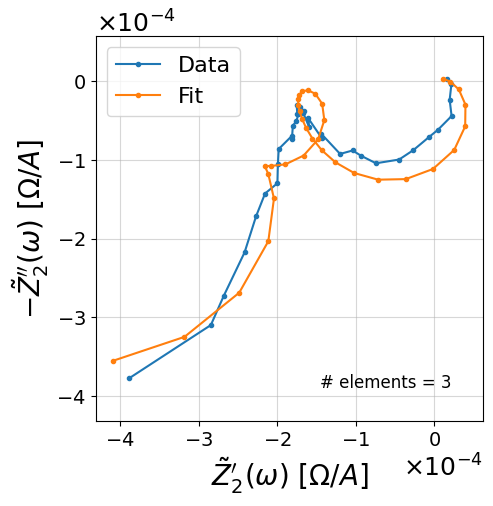

 15%|█▌        | 3/20 [00:00<00:02,  8.24it/s]

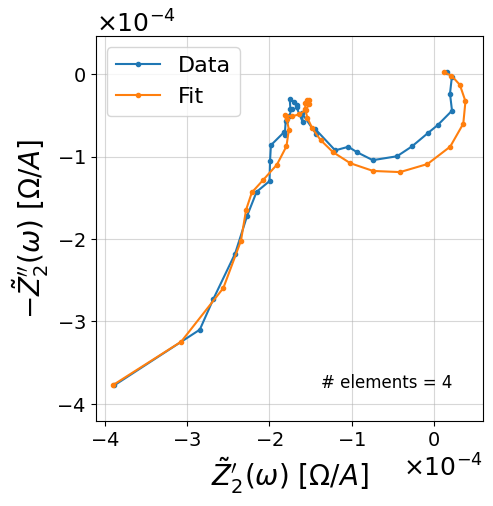

 20%|██        | 4/20 [00:00<00:02,  6.83it/s]

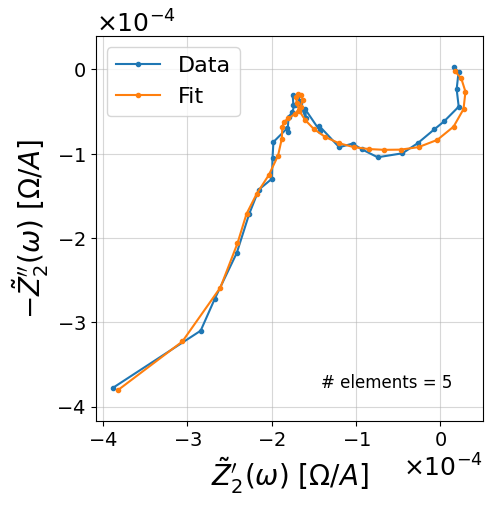

 25%|██▌       | 5/20 [00:00<00:02,  7.08it/s]

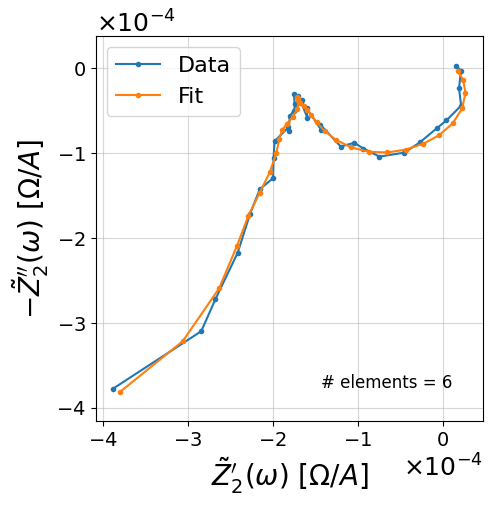

100%|██████████| 6/6 [00:00<00:00,  6.35it/s] 

Optimal solution found with M = 6


In [44]:
results_conf_0p4A = MM(f_0p4A,Z2_0p4A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

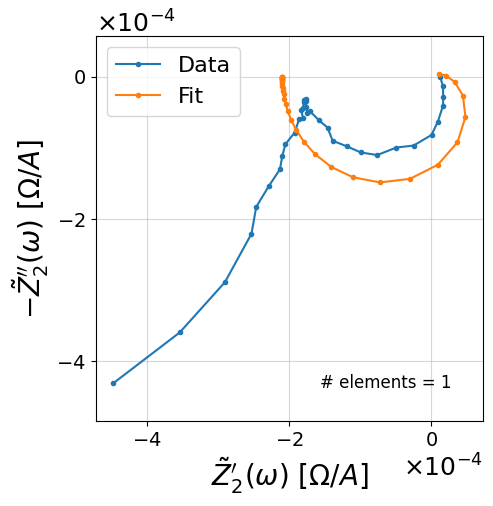

  5%|▌         | 1/20 [00:00<00:04,  4.64it/s]

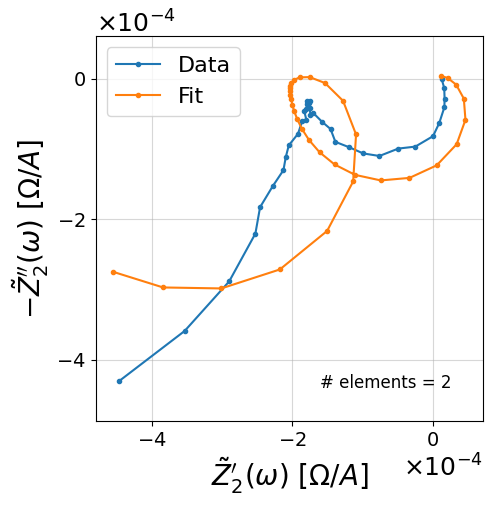

 10%|█         | 2/20 [00:00<00:02,  6.24it/s]

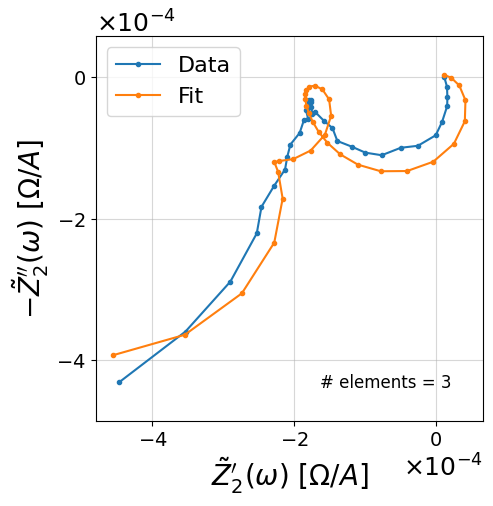

 15%|█▌        | 3/20 [00:00<00:02,  6.79it/s]

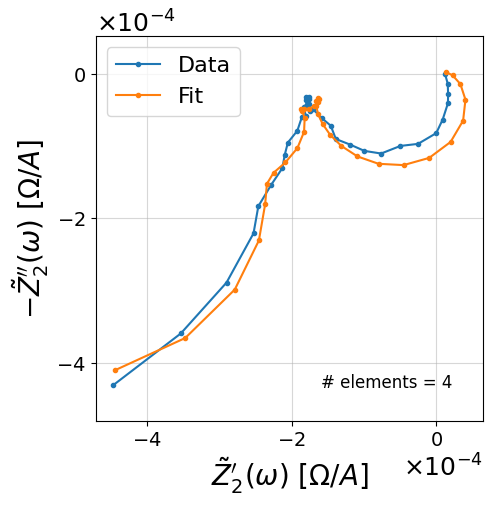

 20%|██        | 4/20 [00:00<00:02,  6.47it/s]

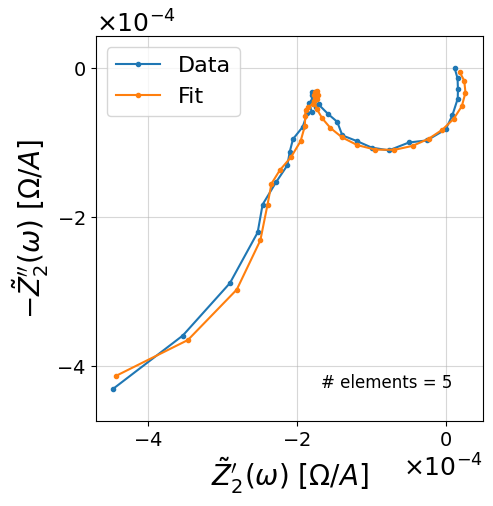

 25%|██▌       | 5/20 [00:00<00:02,  6.87it/s]

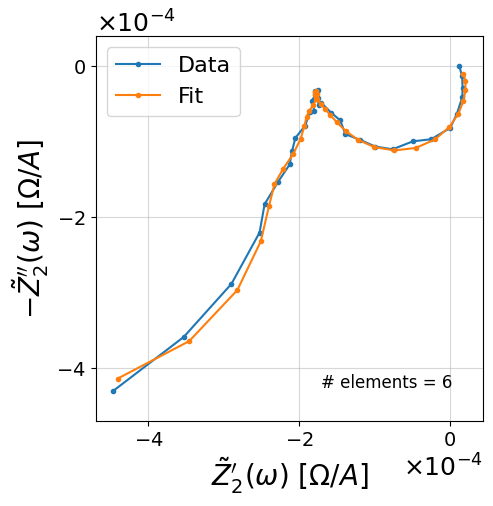

100%|██████████| 6/6 [00:01<00:00,  5.95it/s] 

Optimal solution found with M = 6


In [45]:
results_conf_0p5A = MM(f_0p5A,Z2_0p5A,raw_circuit='Kn',initial_guess = [-0.01,.01], method = 'conf', max_f = 10,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

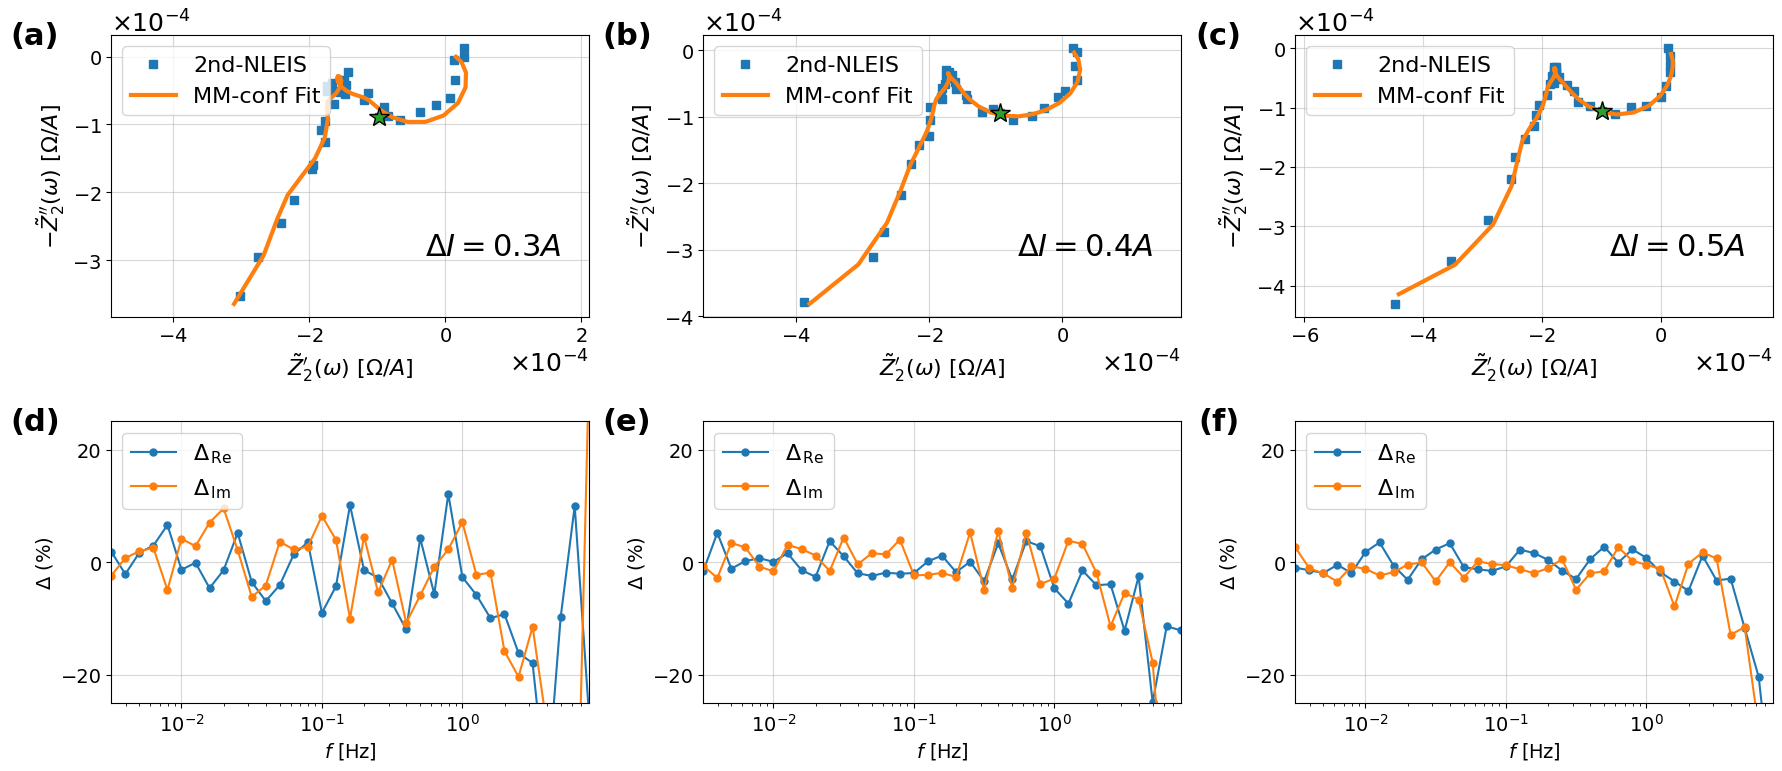

In [46]:
lb = -25
ub = 25
# initialize the figure with 5 plots
# fig, ax = plt.subplots(2,3, figsize=(15, 10))
fig, ax = plt.subplots(2,3, figsize=(18, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
mask = f_0p3A<10
plot_second(ax[0,0], Z2_0p3A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,0],results_conf_0p3A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,0], Z2_0p3A[f_0p3A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)
ax[0,0].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)
ax[0,0].text(0.8, 0.25, '$\Delta I = 0.3 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes, size=22)

# Figure (b)

plot_second(ax[0,1], Z2_0p4A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,1],results_conf_0p4A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2_0p4A[f_0p4A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,1].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)
ax[0,1].text(0.8, 0.25, '$\Delta I = 0.4 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes, size=22)

# Figure (c)

plot_second(ax[0,2], Z2_0p5A[mask], fmt='s',labelsize=fontsize)
plot_second(ax[0,2],results_conf_0p5A[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,2], Z2_0p5A[f_0p5A==1], fmt='*', labelsize=fontsize, marker='*', markeredgecolor='black',ms = 15)

ax[0,2].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)
ax[0,2].text(0.8, 0.25, '$\Delta I = 0.5 A$',horizontalalignment='center',verticalalignment='center', transform=ax[0,2].transAxes, size=22)

# Figure (d)

plot_residuals(ax[1,0], f_0p3A[f_0p3A<10], results_conf_0p3A[4], results_conf_0p3A[5], y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (e)

plot_residuals(ax[1,1], f_0p4A[f_0p4A<10], results_conf_0p4A[4], results_conf_0p4A[5], y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')

# Figure (f)

plot_residuals(ax[1,2], f_0p5A[f_0p5A<10], results_conf_0p5A[4], results_conf_0p5A[5], y_limits=(lb,ub), ms =10)
ax[1,2].legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [47]:
# fig.savefig('figures/SI/FigureS6.png',dpi=300,bbox_inches='tight')

## Pouch Cell Experiments

In [48]:
filename_pouch_1 = 'data/pouch_cell/18A_3p5V.txt'
filename_pouch_2 = 'data/pouch_cell/18B_3p5V.txt'

In [49]:
data_pouch_1 = data_loader(filename_pouch_1, equipment='autolab', fft='scipy', max_k=10,
                multi_current=False, rtol=5e-4, phase_correction=True,
                baseline=True)
data_pouch_2 = data_loader(filename_pouch_2, equipment='autolab', fft='scipy', max_k=10,
                multi_current=False, rtol=5e-4, phase_correction=True,
                baseline=True)

In [50]:
offset = 0.00485745

f_pouch_1 = data_pouch_1[0]
Z1_pouch_1 = data_pouch_1[1]
Z2_pouch_1 = data_pouch_1[2]-offset

f_pouch_2 = data_pouch_2[0]
Z1_pouch_2 = data_pouch_2[1]
Z2_pouch_2 = data_pouch_2[2]-offset

### Figure S8.
#### THD Results for Pouch Cell Replicates 

In [51]:
df_pouch_1 = data_pouch_1[3]
df_pouch_2 = data_pouch_2[3]

In [52]:
I_thd_pouch_1, V_thd_pouch_1 = thd(df_pouch_1)
I_thd_pouch_2, V_thd_pouch_2 = thd(df_pouch_2)

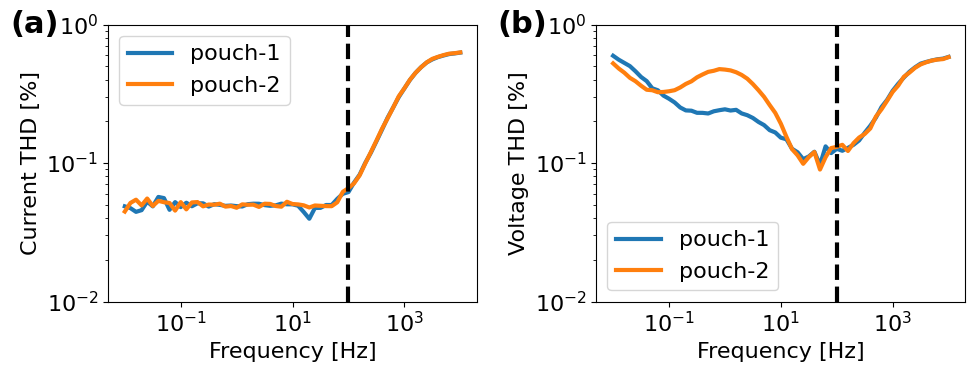

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.2, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

ax[0].loglog(df_pouch_1['freq,[Hz]'],I_thd_pouch_1*100, lw = 3)
ax[0].loglog(df_pouch_2['freq,[Hz]'],I_thd_pouch_2*100, lw = 3)
ax[0].axvline(x=100, color='black', linestyle='--', lw =3 )

ax[0].legend(['pouch-1','pouch-2'],fontsize = fontsize)
ax[0].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[0].set_ylabel('Current THD [%]',fontsize = fontsize)
ax[0].set_ylim([1e-2,1])

ax[1].loglog(df_pouch_1['freq,[Hz]'],V_thd_pouch_1*100, lw = 3)
ax[1].loglog(df_pouch_2['freq,[Hz]'],V_thd_pouch_2*100, lw = 3)
ax[1].axvline(x=100, color='black', linestyle='--', lw =3 )

ax[1].legend(['pouch-1','pouch-2'],fontsize = fontsize)
ax[1].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[1].set_ylabel('Voltage THD [%]',fontsize = fontsize)
ax[1].set_ylim([1e-2,1])

plt.tight_layout()
plt.show()

In [54]:
# fig.savefig('figures/SI/FigureS8.png',dpi=300,bbox_inches='tight')

### Figure S9.
#### LinKK Results for Pouch Cell Replicates

In [55]:
M_pouch_1, mu_pouch_1, Z_linKK_pouch_1, res_real_pouch_1, res_imag_pouch_1 = linKK(f_pouch_1, Z1_pouch_1, c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 0.0015521339819448256
20 0.9996869121673179 0.000591370975240114


In [56]:
M_pouch_2, mu_pouch_2, Z_linKK_pouch_2, res_real_pouch_2, res_imag_pouch_2 = linKK(f_pouch_2, Z1_pouch_2, c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 0.0019913195270216256
20 1.0 0.0011229431923891814


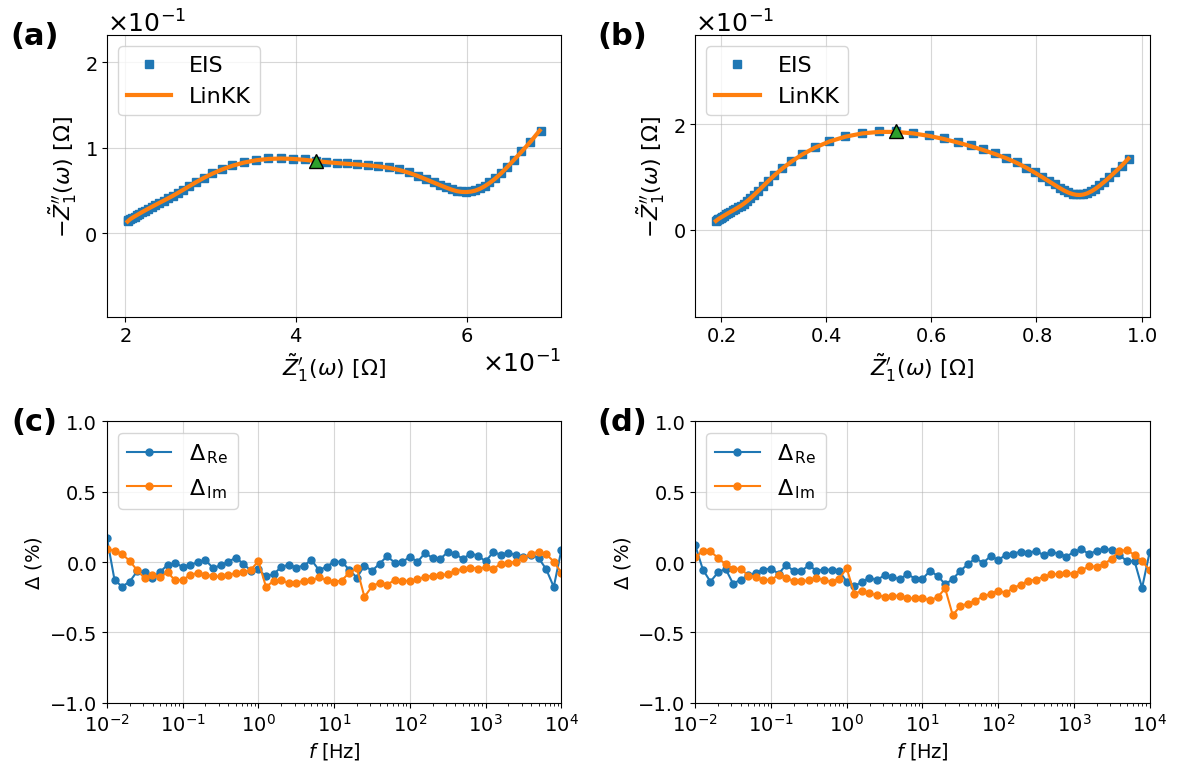

In [57]:
lb = -1
ub = 1

fig, ax = plt.subplots(2,2, figsize=(12, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_first(ax[0,0], Z1_pouch_1, fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z_linKK_pouch_1, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,0], Z1_pouch_1[f_pouch_1==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[0,0].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)

# Figure (b)

plot_first(ax[0,1], Z1_pouch_2, fmt='s',labelsize=fontsize)
plot_first(ax[0,1], Z_linKK_pouch_2, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,1], Z1_pouch_2[f_pouch_2==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[0,1].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)

# Figure (c)

plot_residuals(ax[1,0], f_pouch_1, res_real_pouch_1, res_imag_pouch_1, y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (d)

plot_residuals(ax[1,1], f_pouch_2, res_real_pouch_2, res_imag_pouch_2, y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [58]:
# fig.savefig('figures/SI/FigureS9.png',dpi=300,bbox_inches='tight')

## Figure 8.

## Measurement Model Test for Pouch Cell Replicates (cost method)

In [59]:
max_f_pouch = 100

  0%|          | 0/20 [00:00<?, ?it/s]

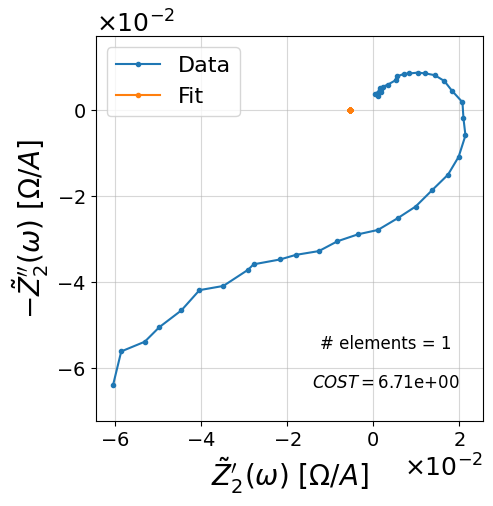

  5%|▌         | 1/20 [00:00<00:02,  8.83it/s]

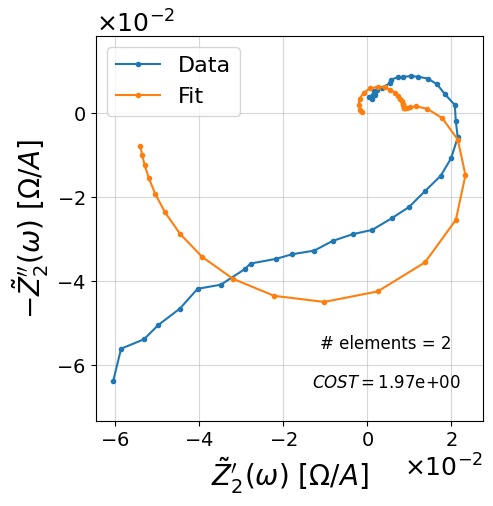

 10%|█         | 2/20 [00:00<00:02,  7.18it/s]

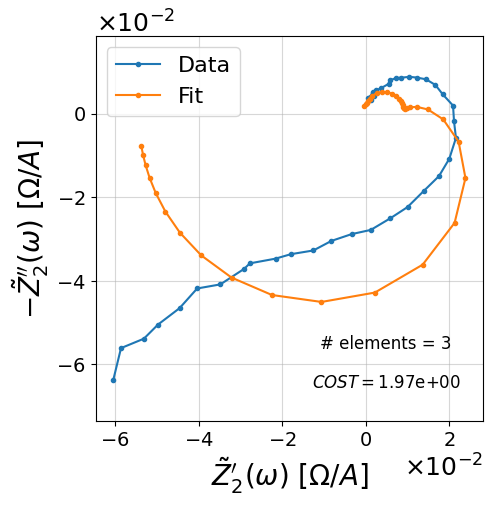

 15%|█▌        | 3/20 [00:00<00:02,  6.07it/s]

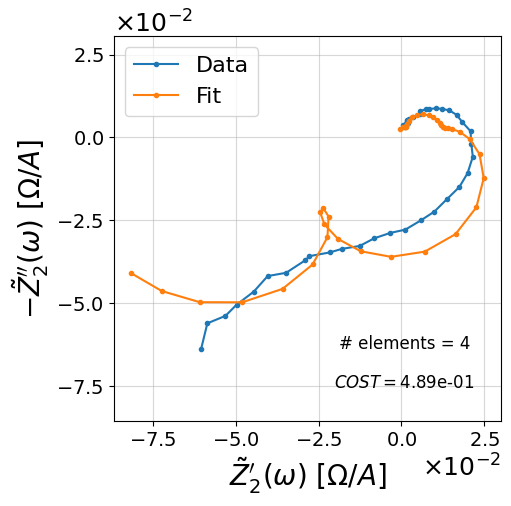

 20%|██        | 4/20 [00:00<00:02,  5.65it/s]

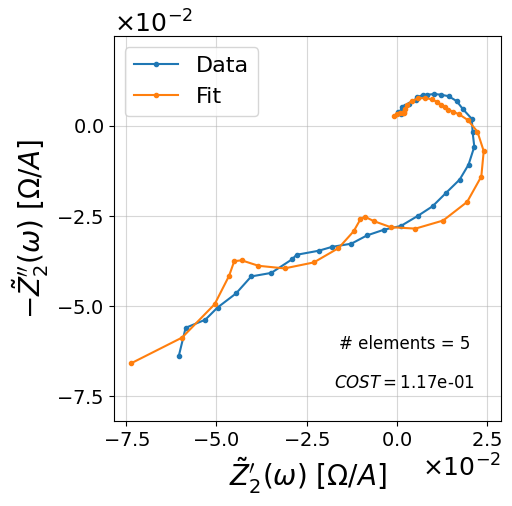

 25%|██▌       | 5/20 [00:00<00:03,  4.48it/s]

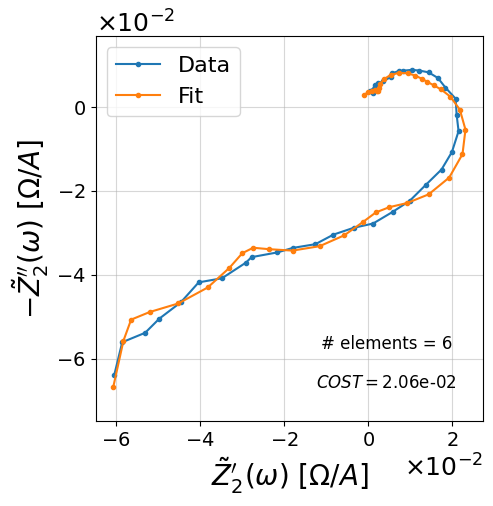

 30%|███       | 6/20 [00:01<00:03,  4.53it/s]

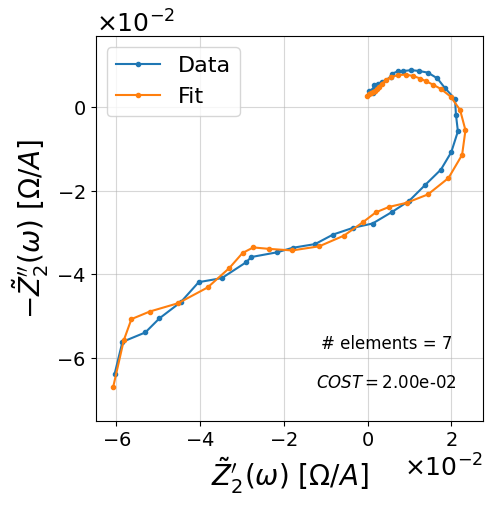

 35%|███▌      | 7/20 [00:01<00:02,  4.71it/s]

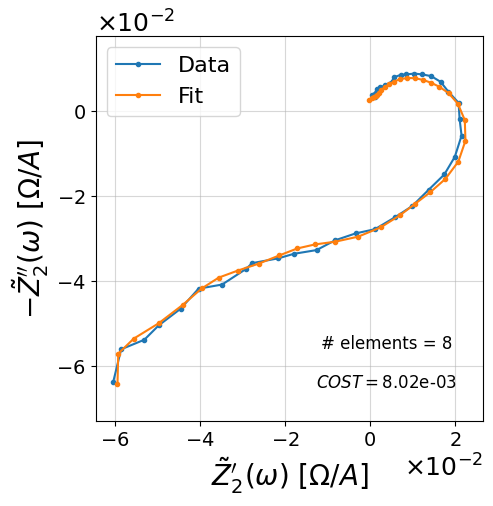

100%|██████████| 8/8 [00:03<00:00,  2.23it/s] 

Optimal solution found with M = 8


In [60]:
results_cost_pouch_1 = MM(f_pouch_1,Z2_pouch_1,raw_circuit='Kn',initial_guess = [0.001,0.01], method = 'cost', max_f = max_f_pouch,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

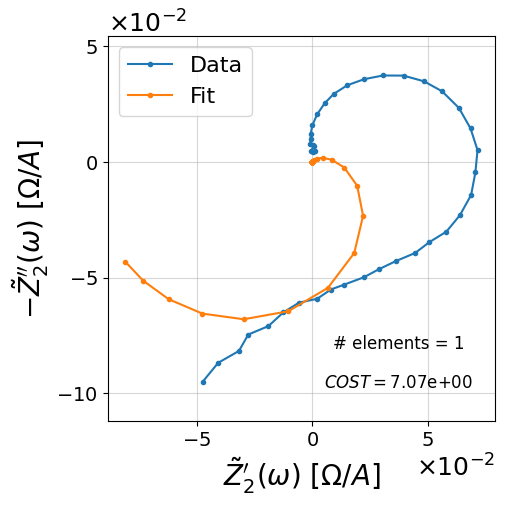

  5%|▌         | 1/20 [00:00<00:02,  7.70it/s]

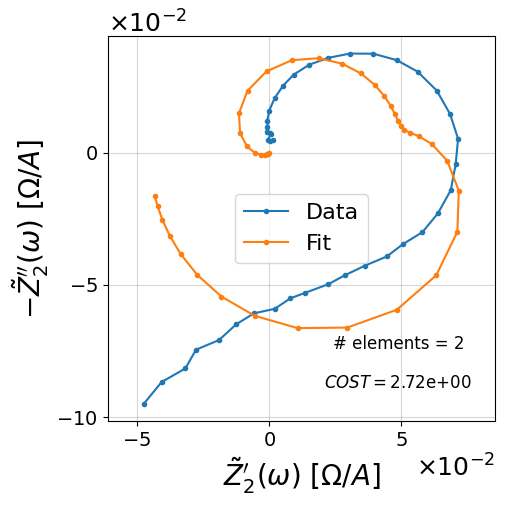

 10%|█         | 2/20 [00:00<00:02,  6.99it/s]

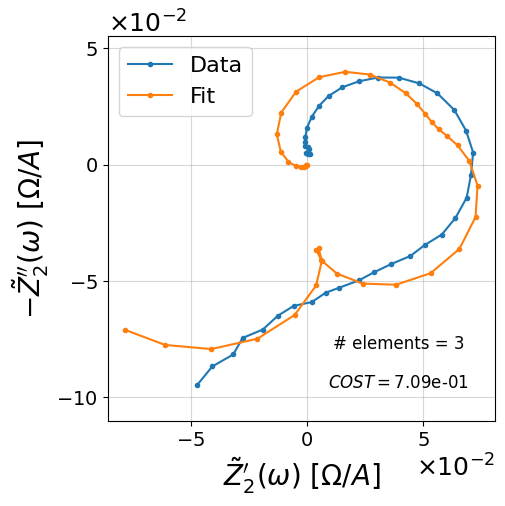

 15%|█▌        | 3/20 [00:00<00:02,  6.79it/s]

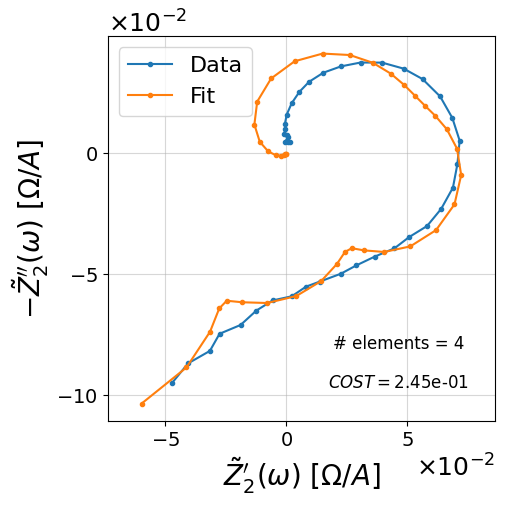

 20%|██        | 4/20 [00:00<00:02,  6.50it/s]

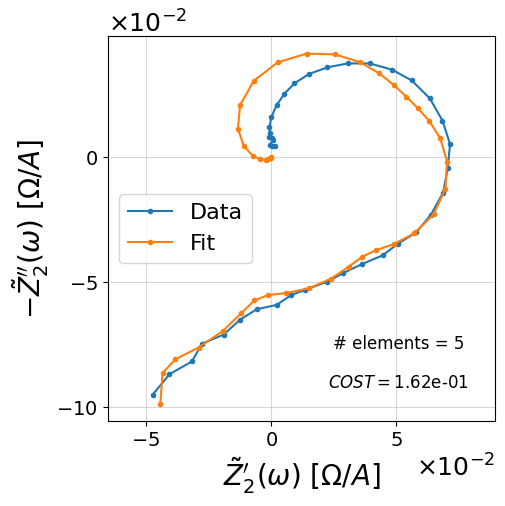

 25%|██▌       | 5/20 [00:00<00:02,  6.21it/s]

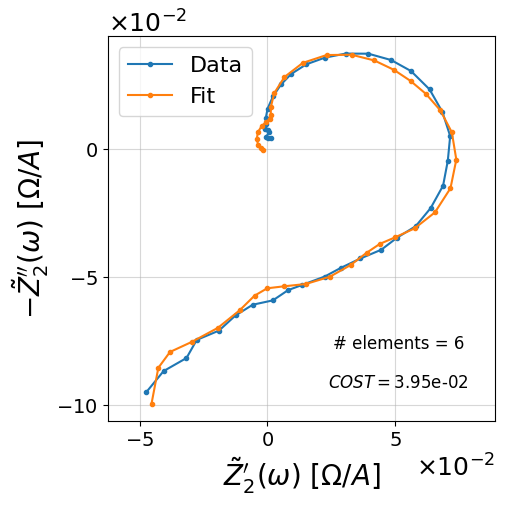

 30%|███       | 6/20 [00:00<00:02,  5.93it/s]

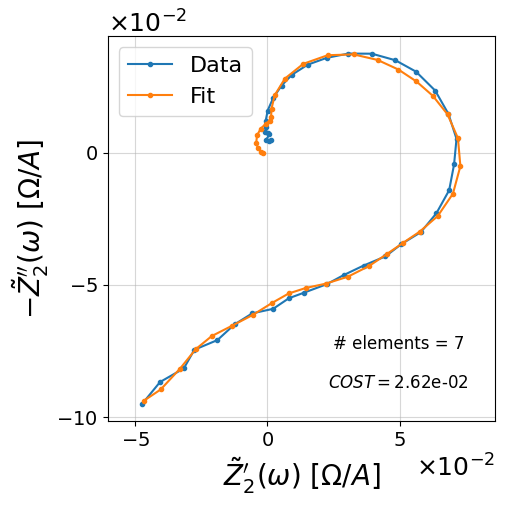

 35%|███▌      | 7/20 [00:01<00:02,  5.08it/s]

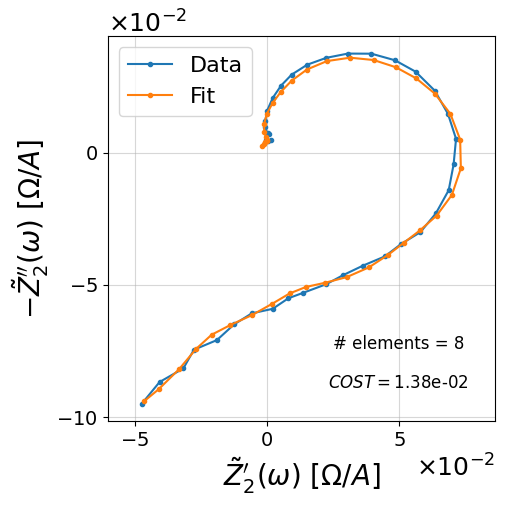

 40%|████      | 8/20 [00:01<00:02,  4.46it/s]

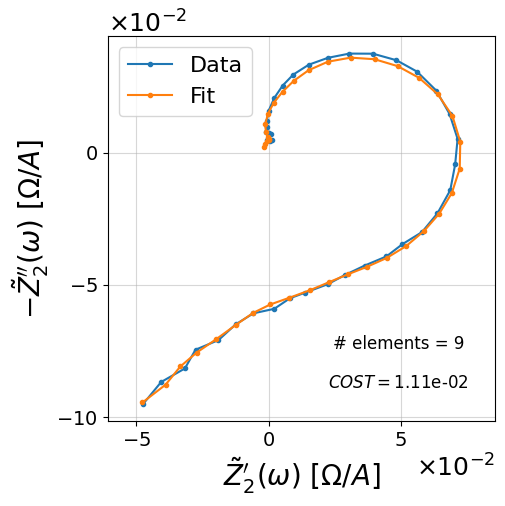

100%|██████████| 9/9 [00:26<00:00,  2.94s/it] 

Optimal solution found with M = 9


In [61]:
results_cost_pouch_2 = MM(f_pouch_2,Z2_pouch_2,raw_circuit='Kn',initial_guess = [0.001,0.1], method = 'cost', max_f = max_f_pouch,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

In [62]:
cir_str = 'Kn0-'*8
circuit = NLEISCustomCircuit(cir_str[:-1],initial_guess=results_cost_pouch_1[1])
Z2_conf_smooth = circuit.predict(np.geomspace(1e-2,max_f_pouch,200))

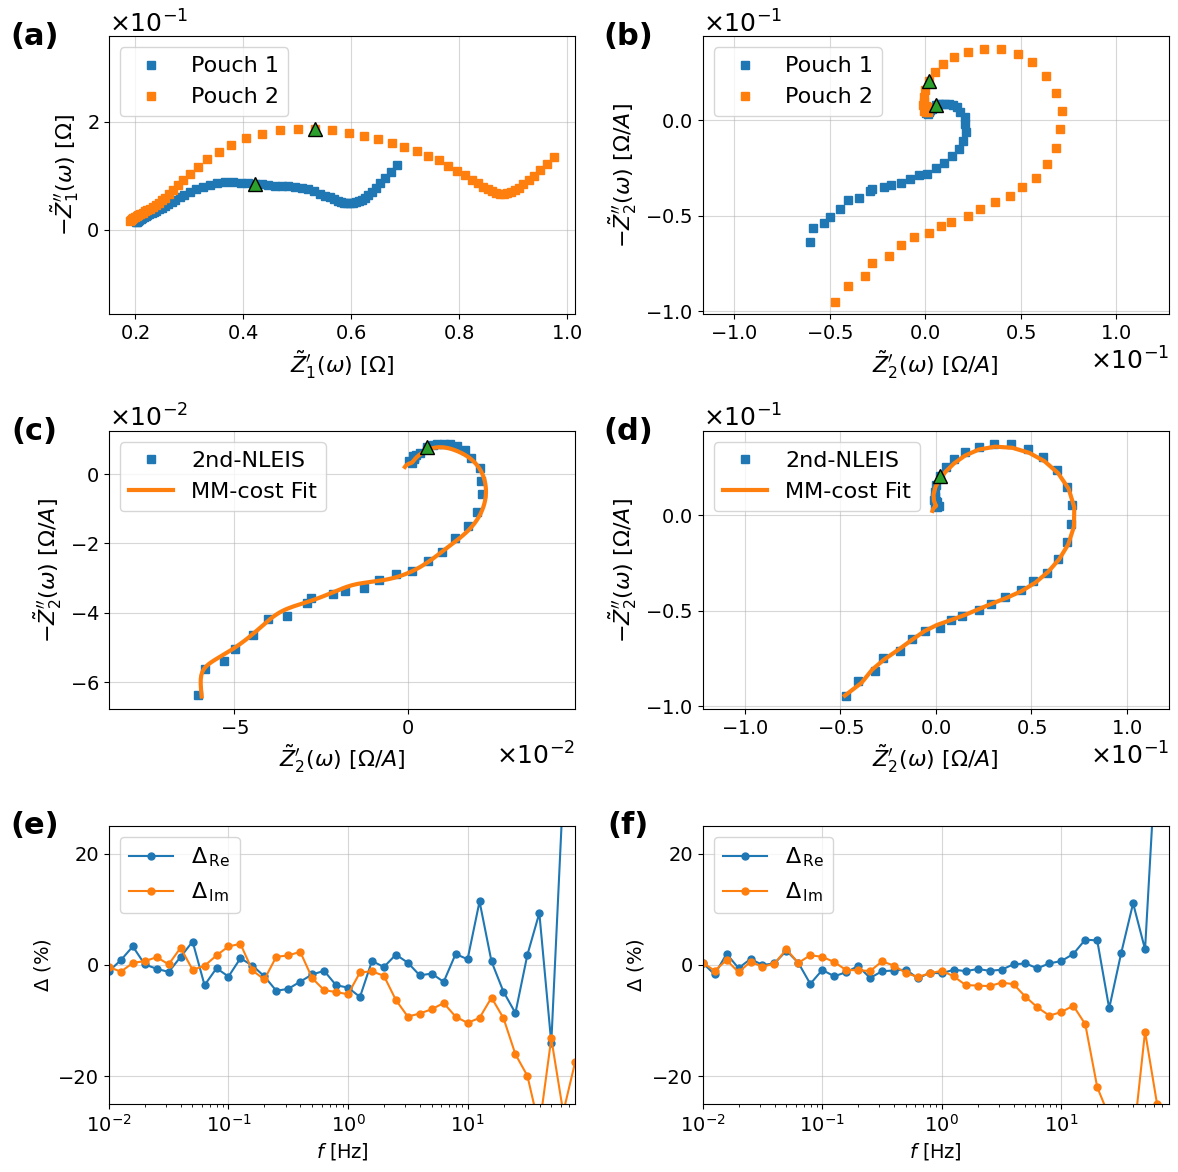

In [63]:
lb = -25
ub = 25

fig, ax = plt.subplots(3,2, figsize=(12, 12))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_first(ax[0,0], Z1_pouch_1, fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z1_pouch_2, fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z1_pouch_1[f_pouch_1 == 10], labelsize=fontsize, marker='^', markerfacecolor = 'C2', markeredgecolor='black',ms = 10)
plot_first(ax[0,0], Z1_pouch_2[f_pouch_2 == 10], labelsize=fontsize, marker='^', markerfacecolor = 'C2', markeredgecolor='black',ms = 10)

ax[0,0].legend(['Pouch 1', 'Pouch 2'], loc=2, fontsize=fontsize)

# Figure (b)

plot_second(ax[0,1], Z2_pouch_1[f_pouch_1<max_f_pouch], fmt='s',labelsize=fontsize)

plot_second(ax[0,1], Z2_pouch_2[f_pouch_2<max_f_pouch], fmt='s',labelsize=fontsize)

plot_second(ax[0,1], Z2_pouch_1[f_pouch_1==10], labelsize=fontsize, marker='^', markerfacecolor = 'C2', markeredgecolor='black',ms = 10)
plot_second(ax[0,1], Z2_pouch_2[f_pouch_2==10], labelsize=fontsize, marker='^', markerfacecolor = 'C2', markeredgecolor='black',ms = 10)

ax[0,1].legend(['Pouch 1', 'Pouch 2'], loc=2, fontsize=fontsize)


# Figure (c)
plot_second(ax[1,0], Z2_pouch_1[f_pouch_1<max_f_pouch], fmt='s',labelsize=fontsize)
plot_second(ax[1,0], Z2_conf_smooth, fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[1,0], Z2_pouch_1[f_pouch_1==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[1,0].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)

# Figure (d)

plot_second(ax[1,1], Z2_pouch_2[f_pouch_2<max_f_pouch], fmt='s',labelsize=fontsize)
plot_second(ax[1,1], results_cost_pouch_2[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[1,1], Z2_pouch_2[f_pouch_2==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[1,1].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)
ax[1,1].set_xlim([-1e-1,1e-1])

# Figure (e)

plot_residuals(ax[2,0], f_pouch_1[f_pouch_1<max_f_pouch], results_cost_pouch_1[4], results_cost_pouch_1[5], y_limits=(lb,ub), ms =10)
ax[2,0].legend(loc = 'upper left')

# Figure (f)

plot_residuals(ax[2,1], f_pouch_2[f_pouch_2<max_f_pouch], results_cost_pouch_2[4], results_cost_pouch_2[5], y_limits=(lb,ub), ms =10)
ax[2,1].legend(loc = 'upper left')


plt.tight_layout()
plt.show()

In [64]:
# fig.savefig('figures/Figure8.png',dpi=300,bbox_inches='tight')

## Figure S10.

## Measurement Model Test for Pouch Cell Replicates (conf method)

  0%|          | 0/20 [00:00<?, ?it/s]

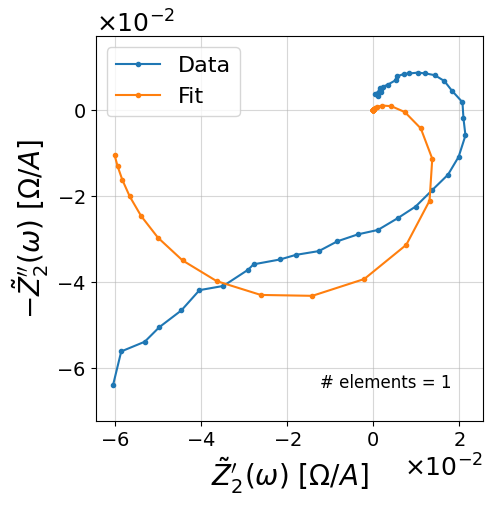

  5%|▌         | 1/20 [00:00<00:02,  7.83it/s]

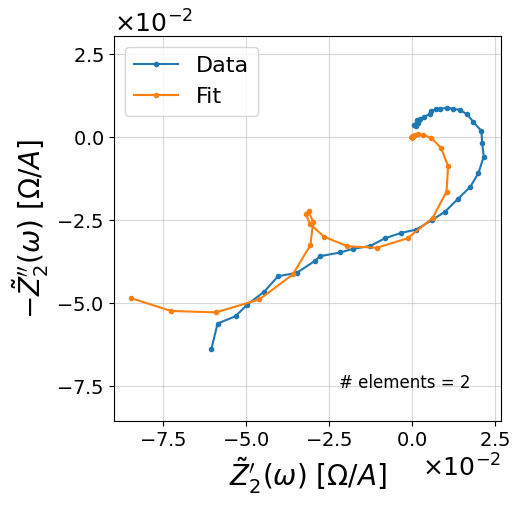

 10%|█         | 2/20 [00:00<00:02,  7.59it/s]

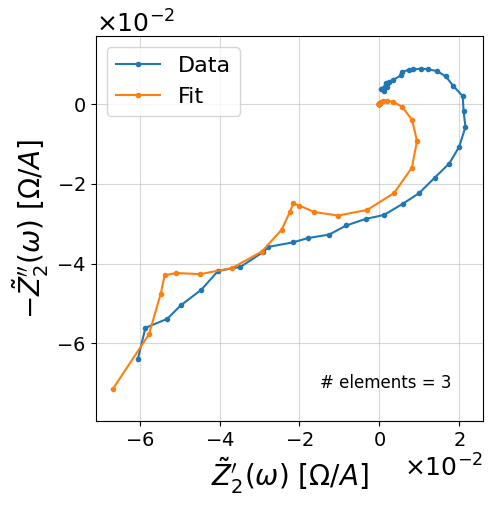

100%|██████████| 3/3 [00:00<00:00,  6.59it/s] 

Optimal solution found with M = 3


In [65]:
results_conf_pouch_1 = MM(f_pouch_1,Z2_pouch_1,raw_circuit='Kn',initial_guess = [0.001,0.1], method = 'conf', max_f = max_f_pouch,
                    max_M = 20, tol = 1e-6,k =2, plot=True,CI_plot=False)

  0%|          | 0/20 [00:00<?, ?it/s]

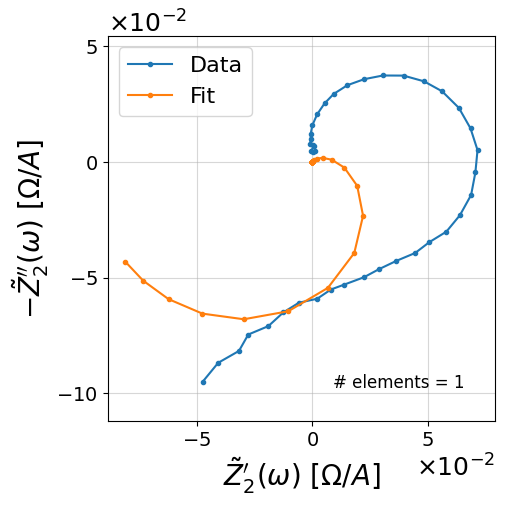

  5%|▌         | 1/20 [00:00<00:02,  8.18it/s]

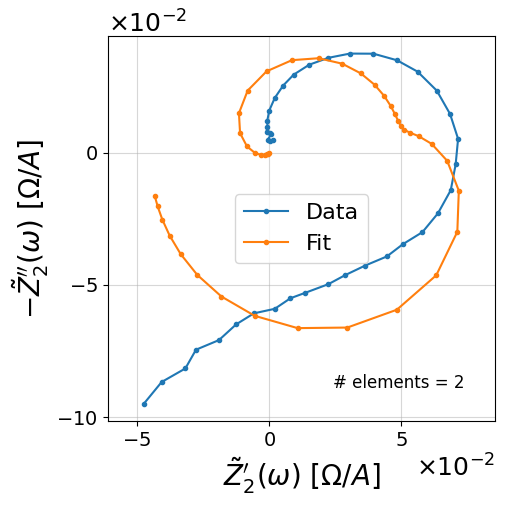

 10%|█         | 2/20 [00:00<00:02,  7.18it/s]

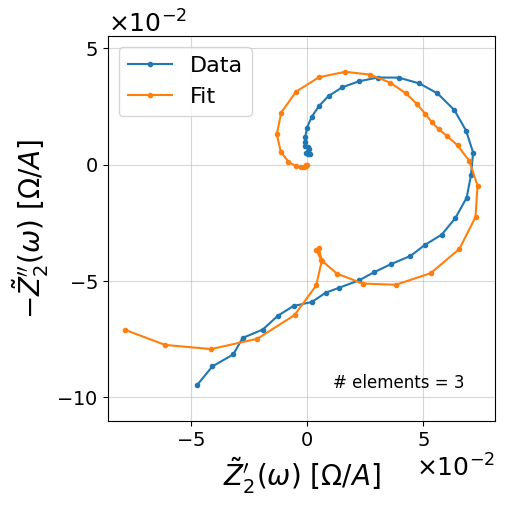

 15%|█▌        | 3/20 [00:00<00:02,  6.78it/s]

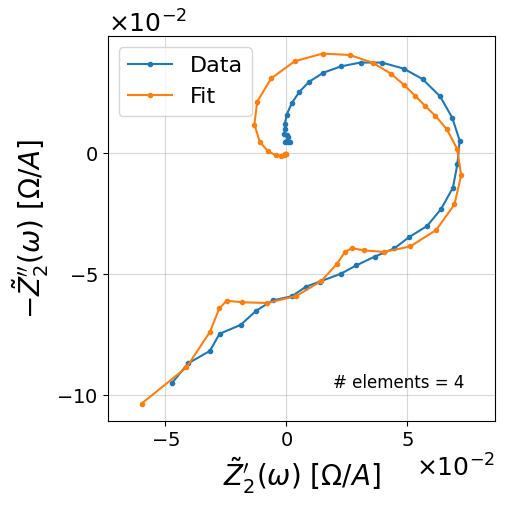

 20%|██        | 4/20 [00:00<00:02,  6.57it/s]

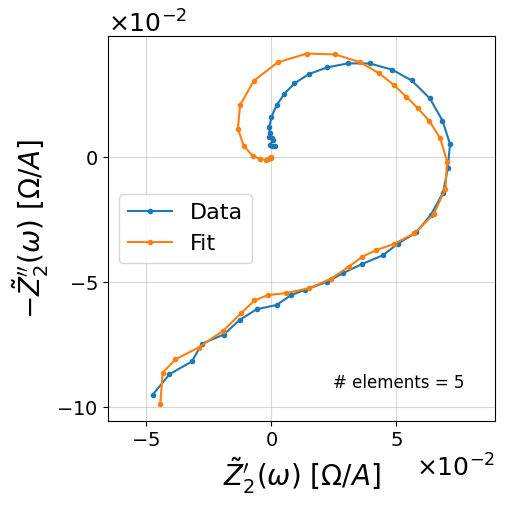

 25%|██▌       | 5/20 [00:00<00:02,  5.37it/s]

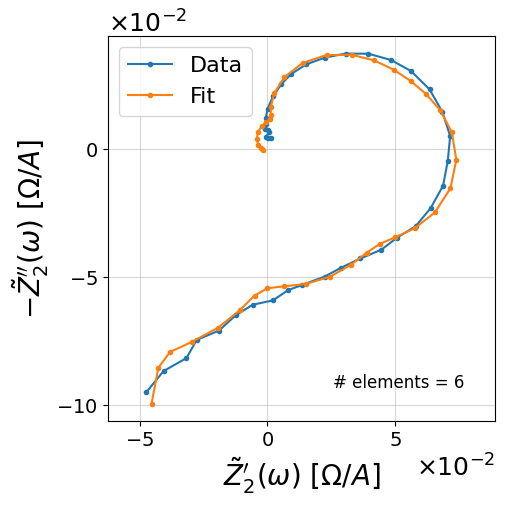

100%|██████████| 6/6 [00:01<00:00,  5.13it/s] 

Optimal solution found with M = 6


In [66]:
results_conf_pouch_2 = MM(f_pouch_2,Z2_pouch_2,raw_circuit='Kn',initial_guess = [0.001,0.1], method = 'conf', max_f = max_f_pouch,
                    max_M = 20, tol = 4e-5,k =2, plot=True,CI_plot=False)

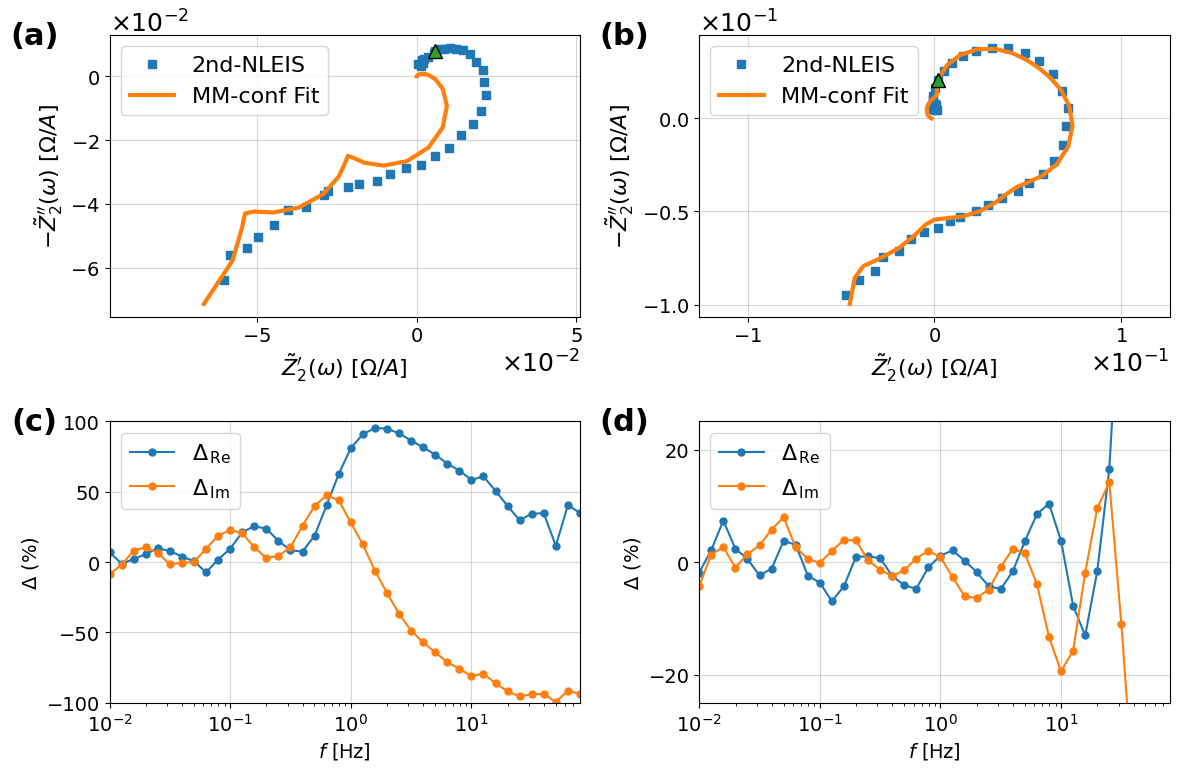

In [67]:

fig, ax = plt.subplots(2,2, figsize=(12, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_first(ax[0,0], Z2_pouch_1[f_pouch_1<max_f_pouch], fmt='s',labelsize=fontsize)
plot_first(ax[0,0],results_conf_pouch_1[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,0], Z2_pouch_1[f_pouch_1==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[0,0].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)

# Figure (b)

plot_second(ax[0,1], Z2_pouch_2[f_pouch_2<max_f_pouch], fmt='s',labelsize=fontsize)
plot_second(ax[0,1],results_conf_pouch_2[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2_pouch_2[f_pouch_2==10], labelsize=fontsize, marker='^', markeredgecolor='black',ms = 10)

ax[0,1].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)
ax[0,1].set_xlim([-1e-1,1e-1])

# Figure (c)
lb = -100
ub = 100
plot_residuals(ax[1,0], f_pouch_1[f_pouch_1<max_f_pouch], results_conf_pouch_1[4], results_conf_pouch_1[5], y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (d)
lb = -25
ub = 25
plot_residuals(ax[1,1], f_pouch_2[f_pouch_2<max_f_pouch], results_conf_pouch_2[4], results_conf_pouch_2[5], y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')


plt.tight_layout()
plt.show()

In [68]:
# fig.savefig('figures/SI/FigureS10.png',dpi=300,bbox_inches='tight')

## Coin Cell Experiments

In [69]:
filename_coin = 'data/coin_cell/241128_GEIS10mV_500kHzto10mHz_1TTE_Cu2_14-7-8_0cycle.csv'

In [70]:
data_coin = data_loader(filename_coin, equipment='autolab', fft='scipy', max_k=5,
                multi_current=False, rtol=5e-4, phase_correction=False,
                baseline=False,freq_domain_visual=False)

In [71]:
f_coin = data_coin[0][1:]
Z1_coin = data_coin[1][1:]
Z2_coin = data_coin[2][1:]

### Figure S12.
#### THD Results for In-house Coin Cell

In [72]:
df_coin = data_coin[3]
I_thd_coin_2, V_thd_coin_2 = thd(df_coin.iloc[1:])

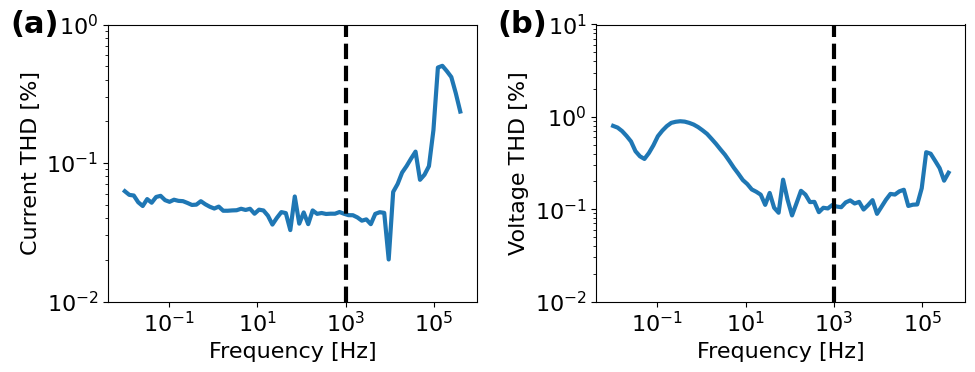

In [73]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
for idx, axi in enumerate(ax.flat):    
    axi.text(-0.2, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

ax[0].loglog(df_coin['freq,[Hz]'].iloc[1:],I_thd_coin_2*100, lw = 3)
ax[0].axvline(x=1000, color='black', linestyle='--', lw =3 )
ax[0].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[0].set_ylabel('Current THD [%]',fontsize = fontsize)
ax[0].set_ylim([1e-2,1])

ax[1].loglog(df_coin['freq,[Hz]'].iloc[1:],V_thd_coin_2*100, lw = 3)
ax[1].axvline(x=1000, color='black', linestyle='--', lw =3 )

ax[1].set_xlabel('Frequency [Hz]',fontsize = fontsize)
ax[1].set_ylabel('Voltage THD [%]',fontsize = fontsize)
ax[1].set_ylim([1e-2,10])

plt.tight_layout()
plt.show()

In [74]:
# fig.savefig('figures/SI/FigureS12.png',dpi=300,bbox_inches='tight')

## Figure 9.
### Kramers-Kronig Test for EIS and 2nd-NLEIS (In-house Coin Cell)

### LinKK

In [75]:
M_coin, mu_coin, Z_linKK_coin, res_real_coin, res_imag_coin = linKK(f_coin, Z1_coin, c=0.85, max_M=100, fit_type='complex', add_cap=True)

10 1.0 0.2723911417435191
20 0.9891614785341643 0.20428059350864566
30 0.9240672136361151 0.20345989447419333


#### MM with Cost Method

In [76]:
max_f_coin = 1e3

  0%|          | 0/20 [00:00<?, ?it/s]

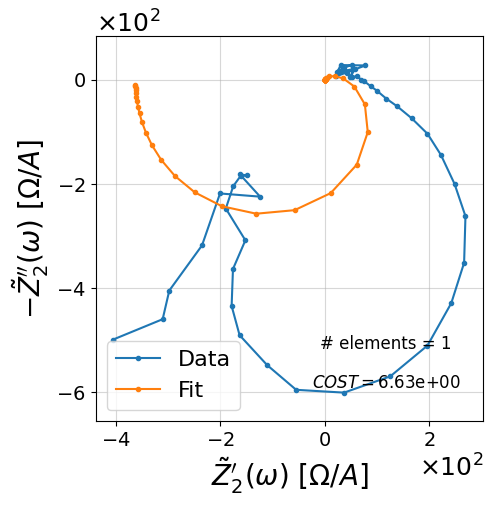

  5%|▌         | 1/20 [00:13<04:18, 13.60s/it]

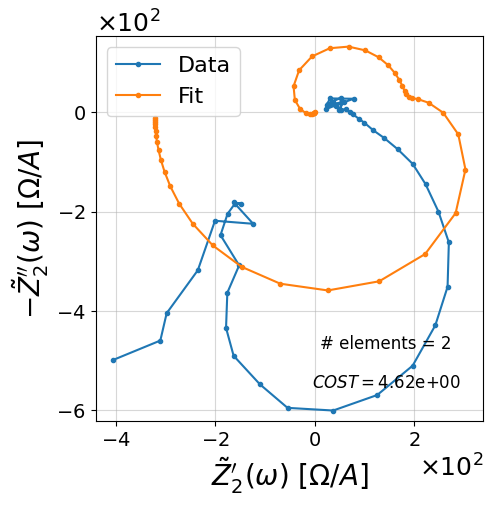

 10%|█         | 2/20 [00:13<01:42,  5.70s/it]

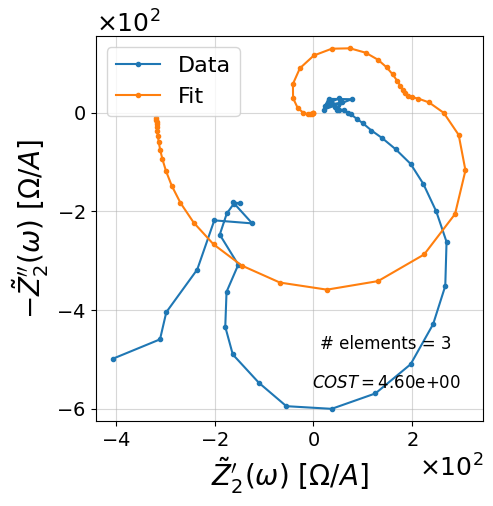

 15%|█▌        | 3/20 [00:14<01:00,  3.55s/it]

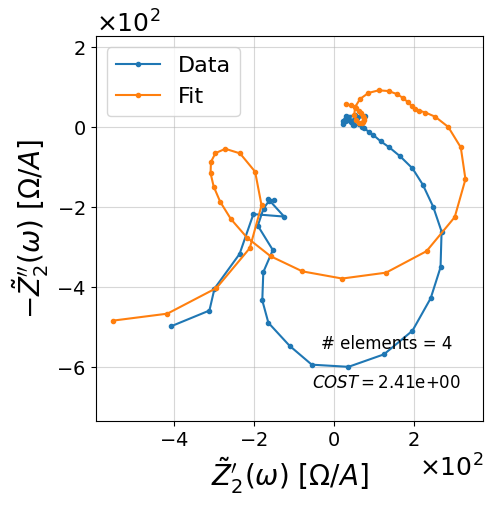

 20%|██        | 4/20 [00:15<00:39,  2.45s/it]

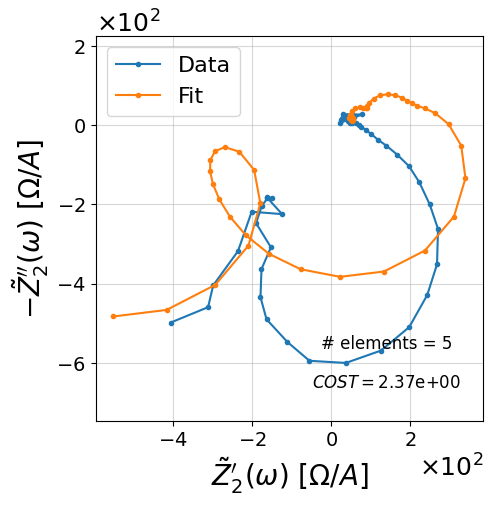

 25%|██▌       | 5/20 [00:15<00:25,  1.68s/it]

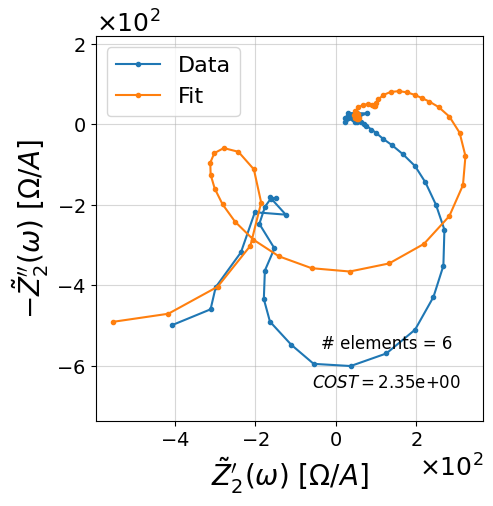

 30%|███       | 6/20 [00:23<00:52,  3.78s/it]

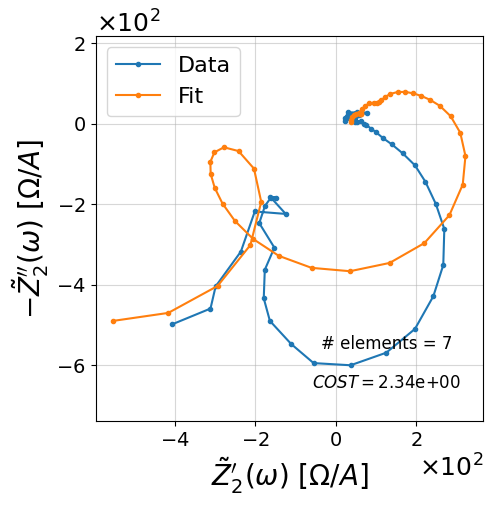

 35%|███▌      | 7/20 [00:36<01:27,  6.74s/it]

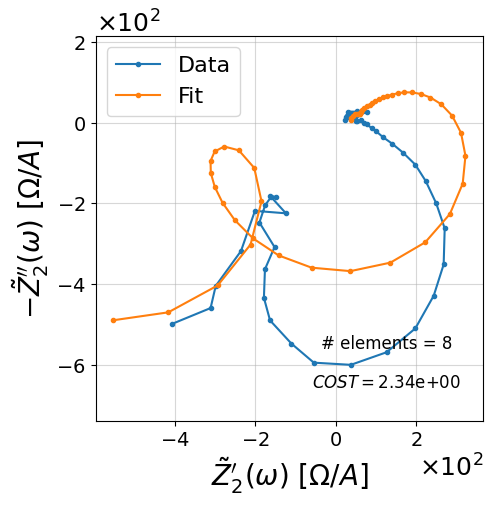

100%|██████████| 8/8 [00:44<00:00,  5.62s/it] 

Optimal solution found with M = 8


In [77]:
results_cost_coin = MM(f_coin,Z2_coin,raw_circuit='Kn',initial_guess = [0.01,0.01], method = 'cost', max_f = max_f_coin,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

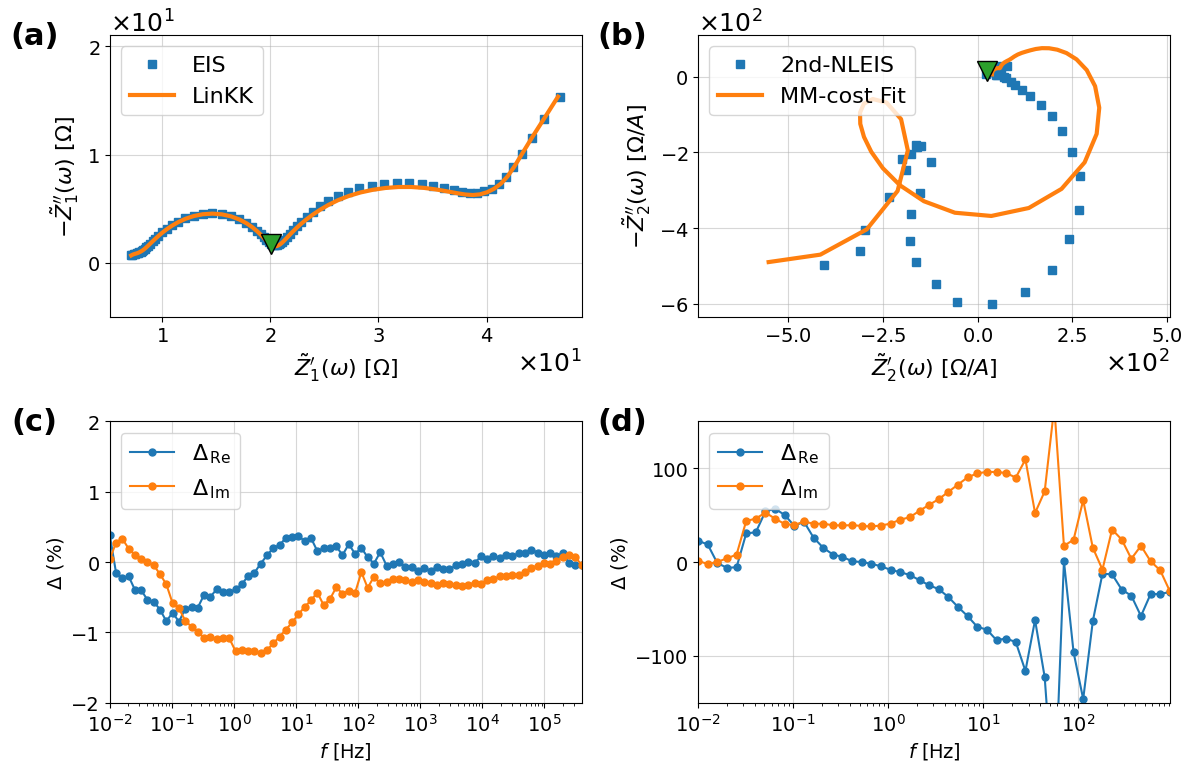

In [78]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.16, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
plot_first(ax[0,0], Z1_coin, fmt='s',labelsize=fontsize)
plot_first(ax[0,0], Z_linKK_coin, fmt='-',lw = 3,labelsize=fontsize)
plot_first(ax[0,0], Z1_coin[f_coin==112.74], labelsize=fontsize, marker='v', markeredgecolor='black',ms = 15)
ax[0,0].legend(['EIS', 'LinKK'], loc=2, fontsize=fontsize)

# Figure (b)
mask_coin = f_coin<max_f_coin

plot_second(ax[0,1], Z2_coin[mask_coin], fmt='s',labelsize=fontsize)
plot_second(ax[0,1], results_cost_coin[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0,1], Z2_coin[f_coin==112.74], labelsize=fontsize, marker='v', markeredgecolor='black',ms = 15)

ax[0,1].legend(['2nd-NLEIS', 'MM-cost Fit'], loc=2, fontsize=fontsize)

# Figure (c)
lb = -2
ub = 2

plot_residuals(ax[1,0], f_coin, res_real_coin, res_imag_coin, y_limits=(lb,ub), ms =10)
ax[1,0].legend(loc = 'upper left')

# Figure (d)
lb = -150
ub = 150

plot_residuals(ax[1,1], f_coin[mask_coin], results_cost_coin[4], results_cost_coin[5], y_limits=(lb,ub), ms =10)
ax[1,1].legend(loc = 'upper left')


plt.tight_layout()
plt.show()

In [79]:
# fig.savefig('figures/Figure9.png',dpi=300,bbox_inches='tight')

### Figure S13.
#### Measurement Model Test for In-house Coin Cell (conf method)

  0%|          | 0/20 [00:00<?, ?it/s]

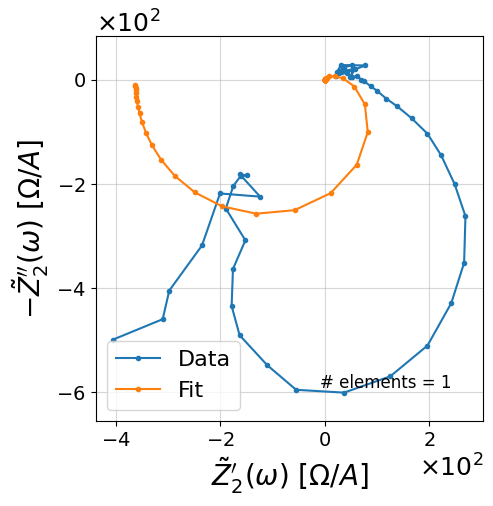

  5%|▌         | 1/20 [00:13<04:10, 13.17s/it]

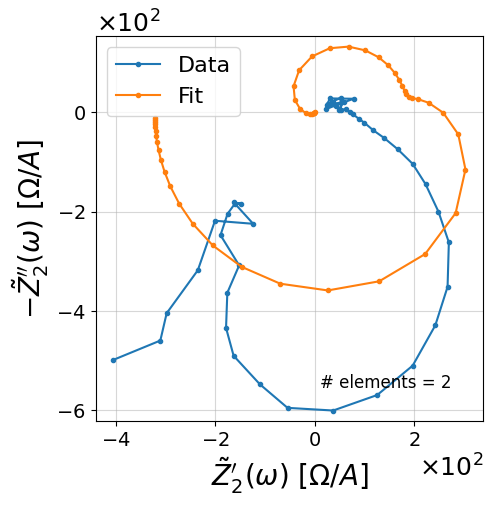

100%|██████████| 2/2 [00:14<00:00,  7.10s/it] 

Optimal solution found with M = 2


In [80]:
results_conf_coin = MM(f_coin,Z2_coin,raw_circuit='Kn',initial_guess = [0.01,0.01], method = 'conf', max_f = max_f_coin,
                    max_M = 20, tol = 5e-4,k =2, plot=True,CI_plot=False)

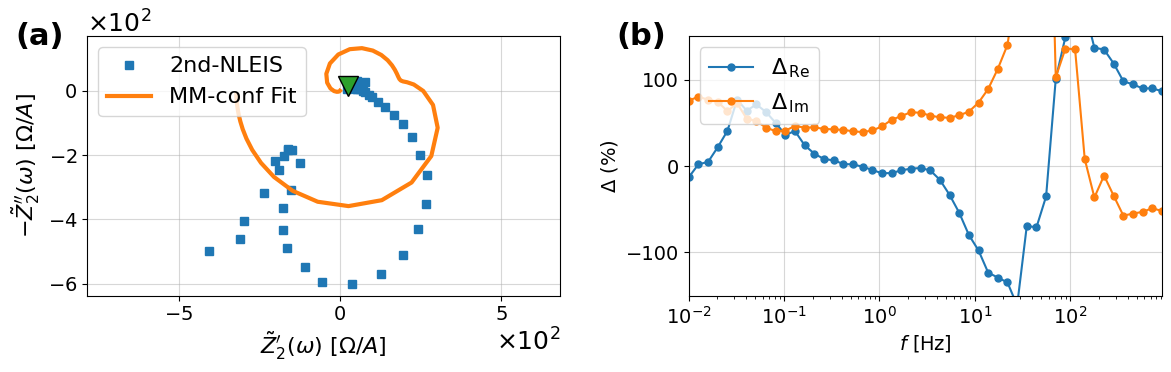

In [81]:
lb = -150
ub = 150
fig, ax = plt.subplots(1,2, figsize=(12, 4))

for idx, axi in enumerate(ax.flat):    
    axi.text(-0.1, 1, f'({string.ascii_lowercase[idx]})',horizontalalignment='center',verticalalignment='center', transform=axi.transAxes, size=22, weight='bold')

# Figure (a)
mask_coin = f_coin<max_f_coin
plot_second(ax[0], Z2_coin[mask_coin], fmt='s',labelsize=fontsize)
plot_second(ax[0],results_conf_coin[3], fmt='-',lw = 3,labelsize=fontsize)
plot_second(ax[0], Z2_coin[f_coin==112.74], labelsize=fontsize, marker='v', markeredgecolor='black',ms = 15)

ax[0].legend(['2nd-NLEIS', 'MM-conf Fit'], loc=2, fontsize=fontsize)

# Figure (b)
plot_residuals(ax[1], f_coin[mask_coin], results_conf_coin[4], results_conf_coin[5], y_limits=(lb,ub), ms =10)
ax[1].legend(loc = 'upper left')
plt.tight_layout()
plt.show()


In [82]:
# fig.savefig('figures/SI/FigureS13.png',dpi=300,bbox_inches='tight')

# Additional Supplementary Figures

### Figure S2
#### Comparison of Linear Randles Circuit and Weakly Nonlinear Randles Circuit with Different Gaussian Distribution Error

In [83]:
f = np.geomspace(1e-3, 1e2, num=100)
Rct = .01 # Ohms (Charge Transfer Resistance)
Cdl = 7.2 # F   (Double layer capacitance of the porous interface)
e = 0.1 # asymmetry parameter
## EIS
circuit='RC'
initial_guess =[Rct, Cdl]
model = CustomCircuit(circuit, initial_guess = initial_guess)
Z1 = model.predict(f)

Z1_01 = Z_add_noise(Z1,std=0.01)
Z1_05 = Z_add_noise(Z1,std=0.05)
Z1_10 = Z_add_noise(Z1,std=0.10)


## 2nd-NLEIS
circuit='RCn'
initial_guess =[Rct, Cdl,e]
model = NLEISCustomCircuit(circuit, initial_guess = initial_guess)
Z2 = model.predict(f)
Z2_01 = Z_add_noise(Z2,std=0.01)
Z2_05 = Z_add_noise(Z2,std=0.05)
Z2_10 = Z_add_noise(Z2,std=0.10)

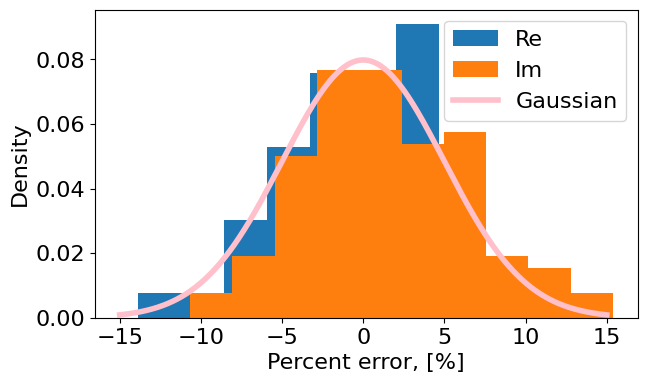

In [84]:
fig, ax = plt.subplots(figsize = (7,4))

Zr = abs(Z2.real)
err1 = (Z2_05.real-Z2.real)/Zr
Zi = abs(Z2.imag)
err2 = (Z2_05.imag-Z2.imag)/Zi

plt.hist(err1*100,density = True, label = 'Re')
plt.hist(err2*100,density = True, label = 'Im')

mu, sigma = 0, std # mean and standard deviation
x = np.linspace(-0.15,.15,1000)
plt.plot(100*x, .01/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (x - mu)**2 / (2 * sigma**2) ),
         linewidth=4, color='pink',label = 'Gaussian')

plt.xlabel('Percent error, [%]', fontsize = fontsize)
plt.ylabel('Density', fontsize = fontsize)
plt.legend(fontsize = fontsize, loc = 'upper right')
plt.tick_params(axis='both', which='major', labelsize=fontsize)

plt.show()

In [85]:
# fig.savefig('figures/SI/FigureS2.png',dpi=300,bbox_inches='tight')